In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
#* magic to add python path to notebook environment
import sys
pypath = sys.path[0]
%env PYTHONPATH $pypath

import json

from rich import print

from python.analysis import Master, BeamParticleSelection, PFOSelection, Plots, shower_merging, vector, Tags, cross_section, EventSelection

import awkward as ak
import numpy as np

shower_merging.SetPlotStyle(extend_colors = True, dpi = 100)

env: PYTHONPATH=/home/sb16165/Documents/pi0-analysis/analysis


In [2]:
config = "work/2023/cex_analysis_1GeV_stopping_muon_config.json"
if not config:
    mc = Master.Data("work/ROOTFiles/PDSPAnalyser/PDSPProd4a_MC_2GeV_reco1_sce_datadriven_v1_ntuple_v09_41_00_03.root", nTuple_type = Master.Ntuple_Type.PDSP)
    data = Master.Data("work/ROOTFiles/PDSPAnalyser/PDSPProd4_data_2GeV_reco2_ntuple_v09_42_03_01.root", nTuple_type = Master.Ntuple_Type.PDSP)

    beam_quality_fits = {
        "mc" : "work/2023/PDSPProd4a_MC_2GeV_reco1_sce_datadriven_v1_ntuple_v09_41_00_03/PDSPProd4a_MC_2GeV_reco1_sce_datadriven_v1_ntuple_v09_41_00_03_fit_values.json",
        "data" : "work/2023/PDSPProd4_data_2GeV_reco2_ntuple_v09_42_03_01/PDSPProd4_data_2GeV_reco2_ntuple_v09_42_03_01_fit_values.json"
    }
else:
    args = cross_section.ApplicationArguments.ResolveConfig(cross_section.LoadConfiguration(config))
    mc = Master.Data(args.mc_file, nTuple_type = Master.Ntuple_Type.PDSP, nEvents = -1)
    data = Master.Data(args.data_file, nTuple_type = Master.Ntuple_Type.PDSP, nEvents = -1)
    beam_quality_fits = {"mc" : args.mc_beam_quality_fit, "data" : args.data_beam_quality_fit}

samples = {"mc" : mc, "data": data}

def FilterSamples(samples : dict, masks : dict, PFO : bool = False):
    for s in samples:
        if PFO:
            samples[s].Filter([masks[s]])
        else:
            samples[s].Filter([masks[s]], [masks[s]])

In [3]:
print(vars(args))

{
    'mc_file': 
'/home/sb16165/Documents/pi0-analysis/analysis/work/ROOTFiles/PDSPAnalyser/PDSPProd4a_MC_1GeV_reco1_sce_datadriven_
v1_ntuple_v09_41_00_03.root',
    'data_file': 
'/home/sb16165/Documents/pi0-analysis/analysis/work/ROOTFiles/PDSPAnalyser/PDSPProd4_data_1GeV_reco2_ntuple_v09_41_
00_04.root',
    'ntuple_type': 'PDSPAnalyser',
    'mc_beam_quality_fit': {
        'mu_x': -30.65809627958841,
        'mu_y': 422.34568362095666,
        'mu_z': 0.1135289164771789,
        'sigma_x': 4.942893728681422,
        'sigma_y': 4.285185873435053,
        'sigma_z': 0.21034159513436101,
        'mu_dir_x': -0.16747688847649297,
        'mu_dir_y': -0.1674556924640795,
        'mu_dir_z': 0.8802001319892422,
        'mu_err_x': 0.019947697873210785,
        'mu_err_y': 0.015112774429332235,
        'mu_err_z': 0.0007016279900377058,
        'sigma_err_x': 0.01821953000979752,
        'sigma_err_y': 0.014799004011892006,
        'sigma_err_z': 0.0005976249149631108,
        'mu_dir_err_x': 0.0005320565431122004,
        'mu_dir_err_y': 0.0008070143905384297,
        'mu_dir_err_z': 0.0005038518266708712
    },
    'data_beam_quality_fit': {
        'mu_x': -28.36561828444284,
        'mu_y': 424.3571388168847,
        'mu_z': 3.240175203737795,
        'sigma_x': 4.382325342451827,
        'sigma_y': 5.316742372968773,
        'sigma_z': 1.3881959430404711,
        'mu_dir_x': -0.14711847945989157,
        'mu_dir_y': -0.1983036792427545,
        'mu_dir_z': 0.8703305320614312,
        'mu_err_x': 0.018554198263240458,
        'mu_err_y': 0.024625608974178467,
        'mu_err_z': 0.006822959713674623,
        'sigma_err_x': 0.01700617554551681,
        'sigma_err_y': 0.021229631666902463,
        'sigma_err_z': 0.005913699099727299,
        'mu_dir_err_x': 0.0006176743773010668,
        'mu_dir_err_y': 0.0010167542129060298,
        'mu_dir_err_z': 0.0006305042840102008
    },
    'upstream_loss_bins': [700, 750, 800, 850, 900, 950, 1000, 1050, 1100],
    'upstream_loss_correction_params': {
        'value': {'p0': 218.73613401098027, 'p1': -0.33577880669017157, 'p2': 0.00012107476838826689},
        'error': {'p0': 28.627349750040036, 'p1': 0.030598434102813755, 'p2': 8.149641185668949e-06}
    },
    'norm': 0.702,
    'selection_masks': {},
    'beam_selection': {
        'selections': {
            'PiBeamSelection': <function PiBeamSelection at 0x7f41d4ca4790>,
            'PandoraTagCut': <function PandoraTagCut at 0x7f41d4ca5f30>,
            'CaloSizeCut': <function CaloSizeCut at 0x7f41d4ca5fc0>,
            'DxyCut': <function DxyCut at 0x7f41d4ca6170>,
            'DzCut': <function DzCut at 0x7f41d4ca6200>,
            'CosThetaCut': <function CosThetaCut at 0x7f41d4ca6290>,
            'MichelScoreCut': <function MichelScoreCut at 0x7f41d4ca63b0>
        },
        'mc_arguments': {
            'PiBeamSelection': {'use_beam_inst': False},
            'PandoraTagCut': {'cut': 13, 'op': '=='},
            'CaloSizeCut': {},
            'DxyCut': {
                'cut': 3,
                'op': '<',
                'fits': {
                    'mu_x': -30.65809627958841,
                    'mu_y': 422.34568362095666,
                    'mu_z': 0.1135289164771789,
                    'sigma_x': 4.942893728681422,
                    'sigma_y': 4.285185873435053,
                    'sigma_z': 0.21034159513436101,
                    'mu_dir_x': -0.16747688847649297,
                    'mu_dir_y': -0.1674556924640795,
                    'mu_dir_z': 0.8802001319892422,
                    'mu_err_x': 0.019947697873210785,
                    'mu_err_y': 0.015112774429332235,
                    'mu_err_z': 0.0007016279900377058,
                    'sigma_err_x': 0.01821953000979752,
                    'sigma_err_y': 0.014799004011892006,
                    'sigma_err_z': 0.0005976249149631108,
                    'mu_dir_err_x': 0.0005320565431122004,
                    'mu_dir_err_y': 0.0008070143905384297

In [3]:
stopping_muon_sample = {k : v.Filter(returnCopy = True) for k, v in samples.items()}

for i in stopping_muon_sample:
    for (k, f), p in zip(args.beam_selection["selections"].items(), args.beam_selection[f"{i}_arguments"].values()):
        print(k)
        mask = f(stopping_muon_sample[i], **p)
        stopping_muon_sample[i].Filter([mask], [mask])

PiBeamSelection

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filters.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filename.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to nTuple_type.
  warnings.warn(f"Couldn't apply filters to {var}.")


PandoraTagCut

CaloSizeCut

DxyCut

DzCut

CosThetaCut

MichelScoreCut

/home/sb16165/anaconda3/envs/python3_10_0/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered in divide
  result = getattr(ufunc, method)(
/home/sb16165/anaconda3/envs/python3_10_0/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in divide
  result = getattr(ufunc, method)(


PiBeamSelection

PandoraTagCut

CaloSizeCut

DxyCut

DzCut

CosThetaCut

MichelScoreCut

In [4]:
def RecoFractionalRange(events : Master.Data, particle : cross_section.Particle, args):
    reco_KE_inst = cross_section.KE(events.recoParticles.beam_inst_P, particle.mass)
    reco_upstream_loss = cross_section.UpstreamEnergyLoss(reco_KE_inst, args.upstream_loss_correction_params["value"])
    reco_KE_ff = reco_KE_inst - reco_upstream_loss
    return events.recoParticles.beam_track_length / cross_section.BetheBloch.RangeFromKE(reco_KE_ff, particle)

muon = cross_section.Particle.from_pdgid(-13)
true_fractional_range = stopping_muon_sample["mc"].trueParticles.beam_track_length / cross_section.BetheBloch.RangeFromKE(stopping_muon_sample["mc"].trueParticles.beam_KE_front_face, muon)

reco_fractional_range = RecoFractionalRange(stopping_muon_sample["mc"], muon, args)
reco_fractional_range_data = RecoFractionalRange(stopping_muon_sample["data"], muon, args)

pdf stopping_muon_selection.pdf has been opened
pdf stopping_muon_selection.pdf has been closed


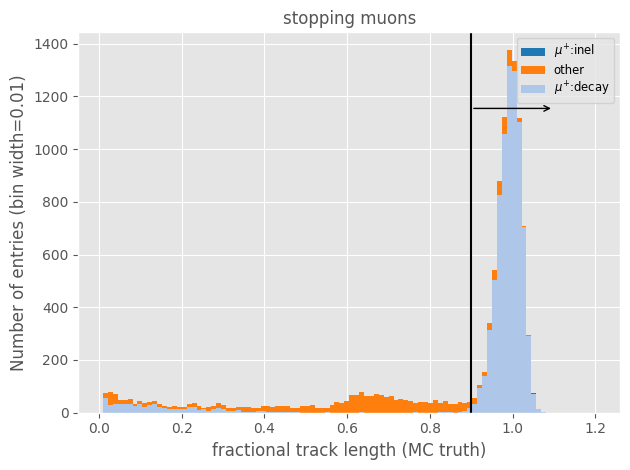

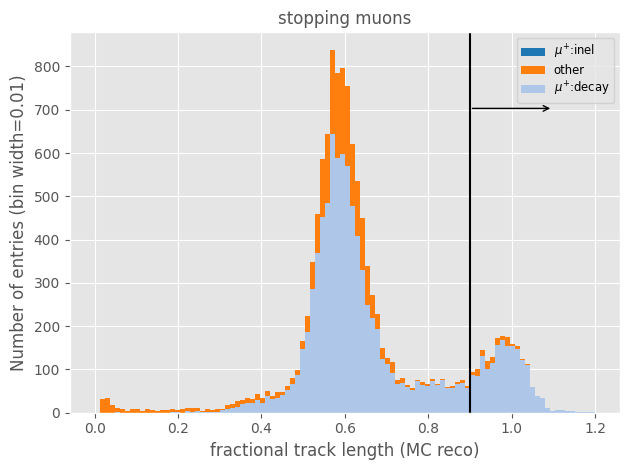

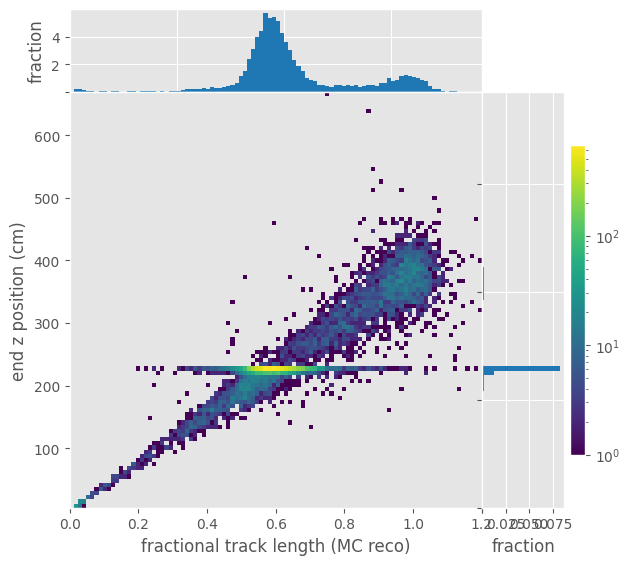

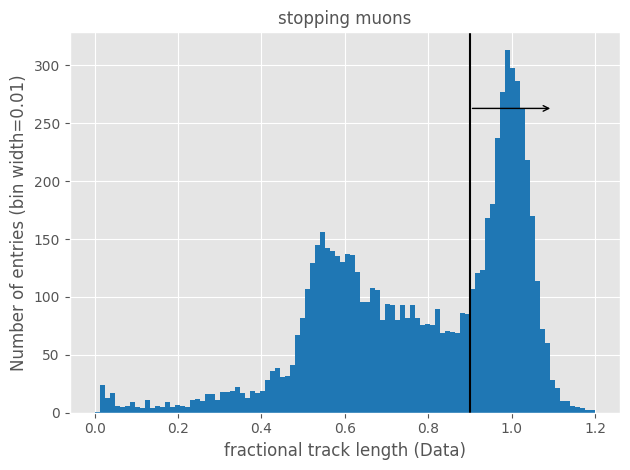

In [5]:
def StoppingMuonTag(events : Master.Data):
    masks = cross_section.Tags.ParticleMasks(events.trueParticlesBT.beam_pdg, [-13])
    masks["other"] = cross_section.Tags.OtherMask(masks)

    decay = events.trueParticlesBT.beam_endProcess == "Decay"

    new_mask = {"$\\mu^{+}$:inel" : masks["$\\mu^{+}$"] & ~decay, "$\\mu^{+}$:decay" : masks["$\\mu^{+}$"] & decay}

    masks.pop("$\\mu^{+}$")

    new_mask.update(masks)
    masks = new_mask

    tags = cross_section.Tags.Tags()
    for i, m in enumerate(masks):
        tags[m] = cross_section.Tags.Tag(m, m, "C" + str(i), masks[m], i)
    return tags

with Plots.PlotBook("stopping_muon_selection.pdf", True) as book:
    Plots.PlotTagged(true_fractional_range, StoppingMuonTag(stopping_muon_sample["mc"]), ncols = 1, x_range = [0.01, 1.2], x_label = "fractional track length (MC truth)", title = "stopping muons")
    Plots.DrawCutPosition(0.9, face = ">")
    book.Save()

    Plots.PlotTagged(reco_fractional_range, StoppingMuonTag(stopping_muon_sample["mc"]), ncols = 1, x_range = [0, 1.2], x_label = "fractional track length (MC reco)", title = "stopping muons")
    Plots.DrawCutPosition(0.9, face = ">")
    book.Save()

    Plots.PlotHist2DMarginal(reco_fractional_range, stopping_muon_sample["mc"].recoParticles.beam_endPos_SCE.z, x_range = [0, 1.2], xlabel = "fractional track length (MC reco)", ylabel = "end z position (cm)")
    book.Save()

    Plots.PlotHist(reco_fractional_range_data, range = [0, 1.2], xlabel = "fractional track length (Data)", title = "stopping muons")
    Plots.DrawCutPosition(0.9, face = ">")
    book.Save()

In [6]:
samples_stopping_muon_selected = {"mc" : stopping_muon_sample["mc"].Filter([reco_fractional_range > 0.9], [reco_fractional_range > 0.9], True), "data" : stopping_muon_sample["data"].Filter([reco_fractional_range_data > 0.9], [reco_fractional_range_data > 0.9], True)}

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filters.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filename.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to nTuple_type.
  warnings.warn(f"Couldn't apply filters to {var}.")


\begin{tabular}{llrrrrrrr}
 & Name & Remaining events & Percentage of total events remaining & Relative percentage events & Remaining PFOs & 
Percentage of total PFOs remaining & Relative percentage of PFOs & Average PFOs per event \\
0 & Initial data & 298194 & 100.000000 & 100.000000 & 390246 & 100.000000 & 100.000000 & 1.308698 \\
1 & - & 170238 & 57.089680 & 57.089680 & 319663 & 81.913203 & 81.913203 & 1.877742 \\
2 & - & 145004 & 48.627404 & 85.177222 & 308679 & 79.098569 & 96.563881 & 2.128762 \\
3 & - & 142362 & 47.741403 & 98.177981 & 302091 & 77.410403 & 97.865744 & 2.121992 \\
4 & - & 115894 & 38.865302 & 81.407960 & 229484 & 58.804959 & 75.965189 & 1.980120 \\
5 & - & 106545 & 35.730095 & 91.933146 & 208965 & 53.546993 & 91.058636 & 1.961284 \\
6 & - & 101106 & 33.906115 & 94.895115 & 199803 & 51.199244 & 95.615534 & 1.976174 \\
7 & - & 12268 & 4.114100 & 12.133800 & 19651 & 5.035542 & 9.835188 & 1.601810 \\
8 & - & 1868 & 0.626438 & 15.226606 & 2457 & 0.629603 & 12.503180 & 1.315310 \\
\end{tabular}

\begin{tabular}{llrrrrrrr}
 & Name & Remaining events & Percentage of total events remaining & Relative percentage events & Remaining PFOs & 
Percentage of total PFOs remaining & Relative percentage of PFOs & Average PFOs per event \\
0 & Initial data & 1215251 & 100.000000 & 100.000000 & 810760 & 100.000000 & 100.000000 & 0.667154 \\
1 & - & 119545 & 9.837062 & 9.837062 & 231210 & 28.517687 & 28.517687 & 1.934083 \\
2 & - & 102882 & 8.465905 & 86.061316 & 217514 & 26.828408 & 94.076381 & 2.114209 \\
3 & - & 100150 & 8.241096 & 97.344531 & 210314 & 25.940352 & 96.689868 & 2.099990 \\
4 & - & 80160 & 6.596168 & 80.039940 & 152936 & 18.863289 & 72.717936 & 1.907884 \\
5 & - & 77612 & 6.386500 & 96.821357 & 147025 & 18.134220 & 96.134985 & 1.894359 \\
6 & - & 71821 & 5.909973 & 92.538525 & 136650 & 16.854556 & 92.943377 & 1.902647 \\
7 & - & 7236 & 0.595433 & 10.075048 & 8526 & 1.051606 & 6.239297 & 1.178275 \\
8 & - & 3143 & 0.258630 & 43.435600 & 3705 & 0.456979 & 43.455313 & 1.178810 \\
\end{tabular}

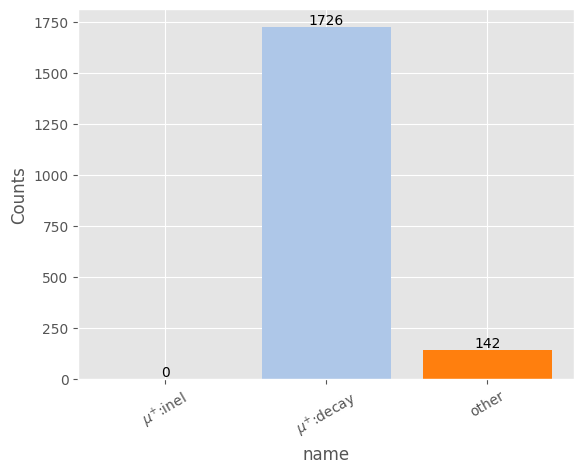

In [15]:
print(samples_stopping_muon_selected["mc"].cutTable.get_table().style.to_latex())
print(samples_stopping_muon_selected["data"].cutTable.get_table().style.to_latex())
Plots.PlotTags(StoppingMuonTag(samples_stopping_muon_selected["mc"]))

pdf reweight.pdf has been opened


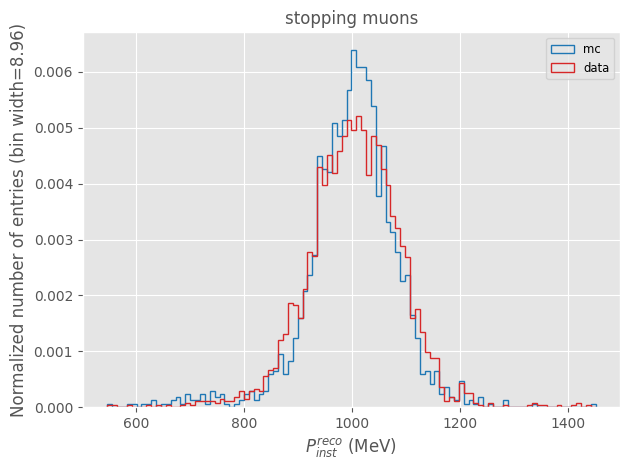

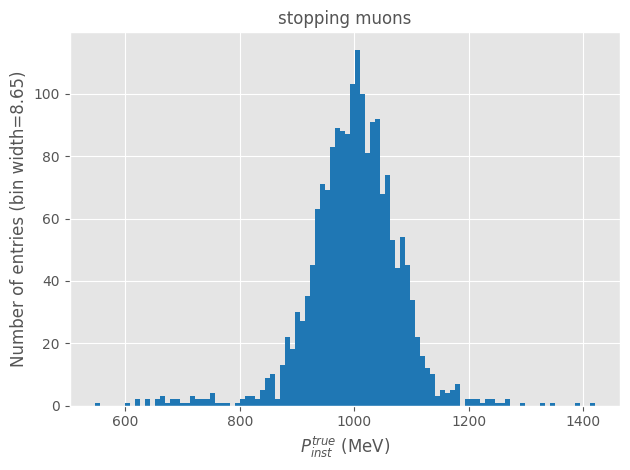

In [16]:
book = Plots.PlotBook("reweight.pdf", True)

Plots.PlotHistComparison([s.recoParticles.beam_inst_P for s in samples_stopping_muon_selected.values()], labels = list(samples_stopping_muon_selected.keys()), xlabel = "$P_{inst}^{reco}$ (MeV)", colours = ["C0", "C6"], title = "stopping muons")
book.Save()

p_inst_true = vector.magnitude(samples_stopping_muon_selected["mc"].trueParticles.momentum[:, 0])

Plots.PlotHist(p_inst_true, xlabel = "$P_{inst}^{true}$ (MeV)", title = "stopping muons")
book.Save()

true_params=array([ 480.85125353, 1002.41884894,   65.61403401])

true_params_err=array([14.15074656,  1.54269605,  1.16199512])

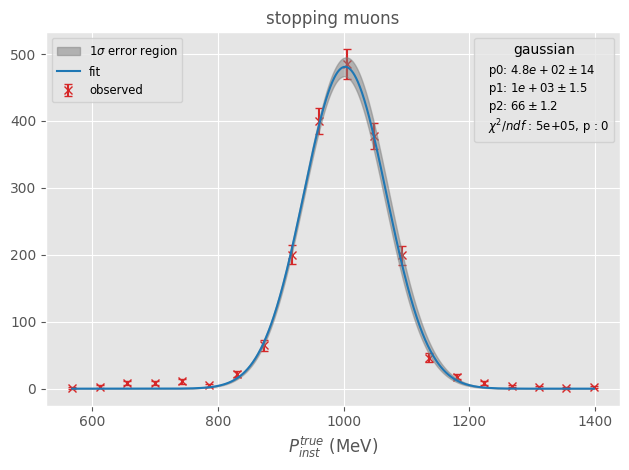

In [17]:
def gauss(x, mu, sigma):
    z = (x - mu) / sigma
    return np.exp(-(z**2)/2)

y, edges = np.histogram(p_inst_true, 20)
x = (edges[1:] + edges[:-1]) / 2
Plots.plt.figure()
true_params, true_params_err = cross_section.Fitting.Fit(x, y, np.sqrt(y), cross_section.Fitting.gaussian, plot = True, title = "stopping muons", xlabel = "$P_{inst}^{true}$ (MeV)")

print(f"{true_params=}")
print(f"{true_params_err=}")
book.Save()


In [18]:
def Weights(p_inst_true, mu, sigma, mu_0, sigma_0):
    weights = cross_section.Fitting.gaussian(p_inst_true, 1, mu, sigma) / cross_section.Fitting.gaussian(p_inst_true, 1, mu_0, sigma_0)
    return np.where(weights > 3, 3, weights)

weights_stopping_muon = Weights(p_inst_true, true_params[1], true_params[2], true_params[1], true_params[2])
print(weights_stopping_muon)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [19]:
range_to_KE = cross_section.BetheBloch.interp_range_to_KE(2000)

1.6825481798715203

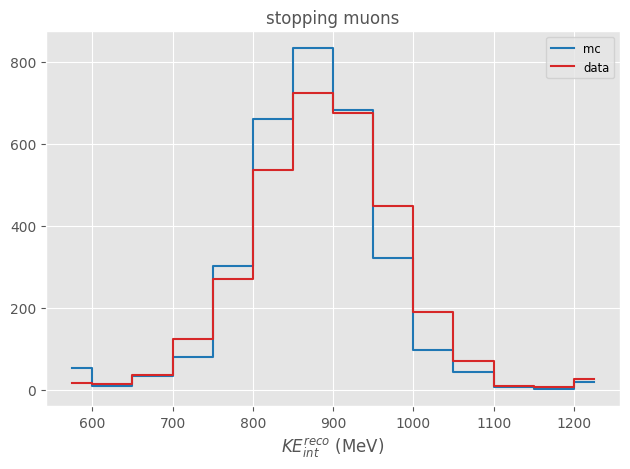

In [20]:
KE_ff_range_bins = np.linspace(550, 1250, 15)

KE_ff_range = {k :range_to_KE(v.recoParticles.beam_track_length) for k, v in samples_stopping_muon_selected.items()}

x = (KE_ff_range_bins[1:] + KE_ff_range_bins[:-1]) / 2
y = {k : np.histogram(np.clip(v, min(KE_ff_range_bins), max(KE_ff_range_bins)), KE_ff_range_bins)[0] for k, v in KE_ff_range.items()}

norm = len(samples_stopping_muon_selected["data"].eventNum)/len(samples_stopping_muon_selected["mc"].eventNum)
print(norm)

Plots.Plot(x, norm * y["mc"], style = "step", color = "C0", label = "mc")
Plots.Plot(x, y["data"], style = "step", color = "C6", label = "data", xlabel = "$KE^{reco}_{int}$ (MeV)", title = "stopping muons", newFigure = False)
book.Save()

In [21]:
# from scipy.optimize import minimize
from iminuit import minimize

def func(p, args):
    mu_fit = p[0]
    sigma_fit = p[1]

    weights = Weights(args["p_inst_true"], mu_fit, sigma_fit, args["mu_0"], args["sigma_0"])
    
    mc = np.clip(args["KE_ff_range"]["mc"], min(args["bins"]), max(args["bins"]))
    data = np.clip(args["KE_ff_range"]["data"], min(args["bins"]), max(args["bins"]))

    hist_mc = np.histogram(mc, args["bins"], weights = weights)[0]
    hist_data = np.histogram(data, args["bins"])[0]
    
    hist_mc = hist_mc * args["norm"]

    bin_index = np.digitize(mc, args["bins"][:-1])

    s = []
    for i in np.linspace(min(bin_index), max(bin_index), len(hist_mc), True):
        w = weights[np.where(bin_index == i)[0]]
        s.append(cross_section.nandiv(sum(w**2), sum(w)))
    s = np.array(s)
    chi2 = (hist_data - hist_mc)**2 / ((s * hist_data) + hist_mc)
    chi2 = np.nansum(chi2) / len(hist_mc)-1
    return chi2

args = {
    "mu_0" : true_params[1],
    "sigma_0" : true_params[2],
    "bins" : KE_ff_range_bins,
    "norm" : norm,
    "p_inst_true" : p_inst_true,
    "KE_ff_range" : KE_ff_range,
    }

result = minimize(func, [true_params[1], true_params[2]], args = [args], method = "simplex")
print(result)

fun: 3.737796917844025
 hess_inv: array([[1., 1.],
       [1., 1.]])
  message: 'Optimization terminated successfully, but uncertainties are unrealiable.'
   minuit: <FMin algorithm='Simplex' edm=0.009511906107174894 edm_goal=0.05 errordef=0.5 fval=3.737796917844025 
has_accurate_covar=False has_covariance=False has_made_posdef_covar=False has_parameters_at_limit=False 
has_posdef_covar=False has_reached_call_limit=False has_valid_parameters=True hesse_failed=False 
is_above_max_edm=False is_valid=True nfcn=23 ngrad=0 reduced_chi2=nan time=0.3617013949997272>
(Param(number=0, name='x0', value=1013.4611190739467, error=6.813522988272163, merror=None, is_const=False, 
is_fixed=False, lower_limit=None, upper_limit=None), Param(number=1, name='x1', value=66.91349945305326, 
error=1.6538571897232626, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None))
     nfev: 23
     njev: 0
  success: True
        x: array([1013.46111907,   66.91349945])

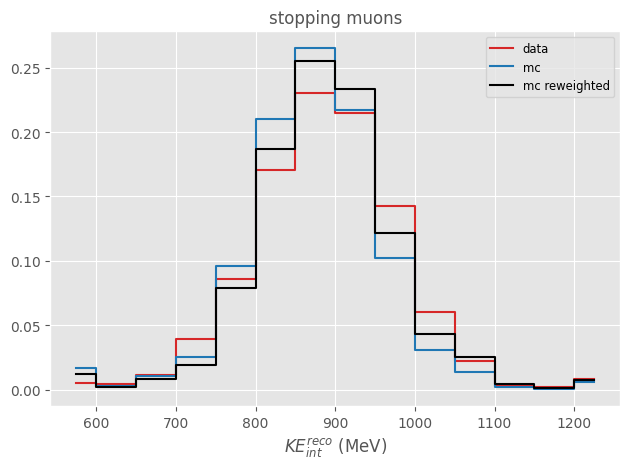

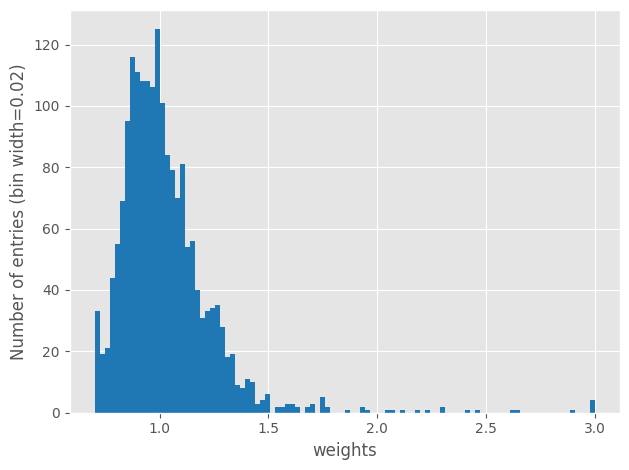

In [22]:
weights_stopping_muon = Weights(args["p_inst_true"], result.x[0], result.x[1], true_params[1], true_params[2])

hist_data = np.histogram(np.clip(args["KE_ff_range"]["data"], min(args["bins"]), max(args["bins"])), args["bins"])[0]

hist_mc = np.histogram(np.clip(args["KE_ff_range"]["mc"], min(args["bins"]), max(args["bins"])), args["bins"])[0]
hist_mc_weighted = np.histogram(np.clip(args["KE_ff_range"]["mc"], min(args["bins"]), max(args["bins"])), args["bins"], weights = weights_stopping_muon)[0]


x = (KE_ff_range_bins[1:] + KE_ff_range_bins[:-1]) / 2
Plots.Plot(x, hist_data / sum(hist_data), style = "step", label = "data", color = "C6")
Plots.Plot(x, hist_mc / sum(hist_mc), style = "step", label = "mc", color = "C0", newFigure = False)
Plots.Plot(x, hist_mc_weighted / sum(hist_mc_weighted), style = "step", label = "mc reweighted", color = "k", xlabel = "$KE^{reco}_{int}$ (MeV)", title = "stopping muons", newFigure = False)
book.Save()
Plots.PlotHist(weights_stopping_muon, xlabel = "weights")
book.Save()

fit_results_mc=(array([ 176.41374618, 1014.68619014,   68.88936229]), array([5.23765309, 1.61601937, 1.26545284]))

fit_results_data=(array([ 268.75631108, 1003.71517133,   75.64129965]), array([6.01877233, 1.37929001, 
1.00940737]))

smearing_mu, smearing_mu_err=(-10.9710188109309, 2.1246080900786573)

smearing_sigma, smearing_sigma_err=(31.238789587733685, 3.709668253077893)

pdf reweight.pdf has been closed


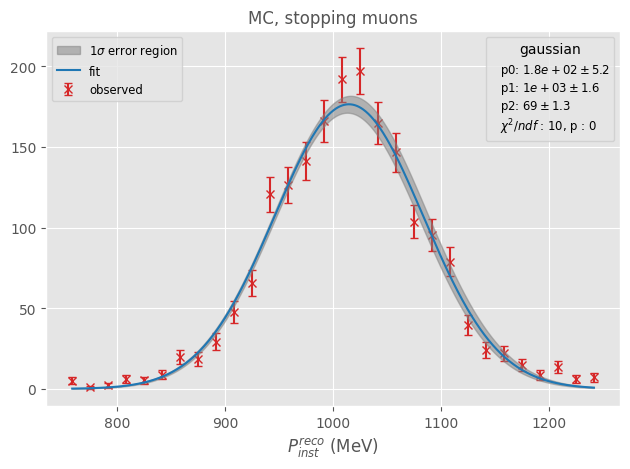

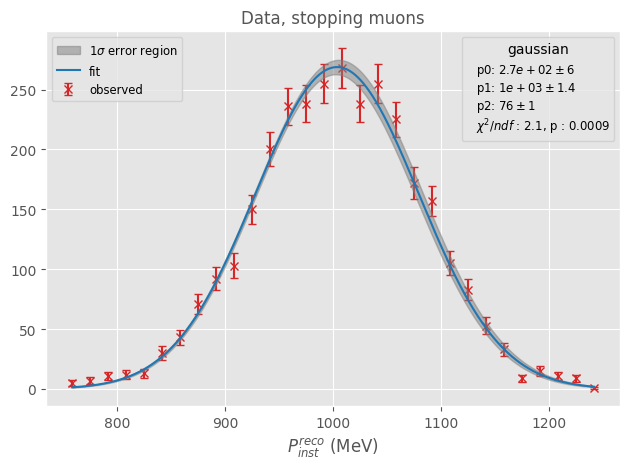

In [23]:
y, edges = np.histogram(np.array(samples_stopping_muon_selected["mc"].recoParticles.beam_inst_P), 30, range = [750, 1250], weights = np.array(weights_stopping_muon))
x = (edges[1:] + edges[:-1]) / 2
Plots.plt.figure()
fit_results_mc = cross_section.Fitting.Fit(x, y, np.sqrt(y), cross_section.Fitting.gaussian, plot = True, xlabel = "$P_{inst}^{reco}$ (MeV)", title = "MC, stopping muons")
book.Save()

y, edges = np.histogram(np.array(samples_stopping_muon_selected["data"].recoParticles.beam_inst_P), 30, range = [750, 1250])
x = (edges[1:] + edges[:-1]) / 2
Plots.plt.figure()
fit_results_data = cross_section.Fitting.Fit(x, y, np.sqrt(y), cross_section.Fitting.gaussian, plot = True, xlabel = "$P_{inst}^{reco}$ (MeV)", title = "Data, stopping muons")
book.Save()

smearing_mu = fit_results_data[0][1] - fit_results_mc[0][1]
smearing_sigma = np.sqrt(fit_results_data[0][2]**2 - fit_results_mc[0][2]**2)

smearing_mu_err = np.sqrt(fit_results_data[1][1]**2 + fit_results_mc[1][1]**2)

smearing_sigma_err = (1/smearing_sigma) * np.sqrt((fit_results_data[0][2] * fit_results_data[1][2])**2 + (fit_results_mc[0][2] * fit_results_mc[1][2])**2)

print(f"{fit_results_mc=}")
print(f"{fit_results_data=}")

print(f"{smearing_mu, smearing_mu_err=}")
print(f"{smearing_sigma, smearing_sigma_err=}")

book.close()

In [24]:
args_nominal = cross_section.ApplicationArguments.ResolveConfig(cross_section.LoadConfiguration("work/2023/cex_analysis_1GeV_config.json"))

pion_sample = {k : v.Filter(returnCopy = True) for k, v in samples.items()}

for k in pion_sample:
    masks = args_nominal.selection_masks[k]["beam"]
    for mask in masks.values():
        pion_sample[k].Filter([mask], [mask])


/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filters.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filename.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to nTuple_type.
  warnings.warn(f"Couldn't apply filters to {var}.")


In [25]:
smearing_mc_pions = -np.random.normal(smearing_mu, smearing_sigma, len(pion_sample["mc"].eventNum))

In [26]:
def KEs(samples, upstream_energy_loss_params, smearing : np.array = None):
    KE_samples = {}

    if smearing is None:
        smearing = np.zeros(len(samples["mc"].eventNum))

    for s in samples:
        obs = {}
        p = samples[s].recoParticles.beam_inst_P - smearing if s == "mc" else samples[s].recoParticles.beam_inst_P
        obs["reco_KE_inst"] = cross_section.KE(p, cross_section.Particle.from_pdgid(211).mass)

        reco_upstream_loss = cross_section.UpstreamEnergyLoss(obs["reco_KE_inst"], upstream_energy_loss_params)
        obs["reco_KE_ff"] = obs["reco_KE_inst"] - reco_upstream_loss
        obs["reco_KE_int"] = obs["reco_KE_ff"] - cross_section.RecoDepositedEnergy(samples[s], obs["reco_KE_ff"], "bb")
        # reco_track_length = samples[s].recoParticles.beam_track_length
        # outside_tpc_reco = (samples[s].recoParticles.beam_endPos_SCE.z < 0) | (samples[s].recoParticles.beam_endPos_SCE.z > 700)
        KE_samples[s] = obs
    return KE_samples

In [27]:
weights_pion_sample = Weights(vector.magnitude(pion_sample["mc"].trueParticles.momentum[:, 0]), result.x[0], result.x[1], true_params[1], true_params[2])
norm  = True
reco_KE_unsmeared = KEs(pion_sample, args_nominal.upstream_loss_correction_params["value"])
reco_KE_smeared = KEs(pion_sample, args_nominal.upstream_loss_correction_params["value"], smearing_mc_pions)


track_length/n=<Array [0.237, 1.77, 0.673, ... 1.22, 0.988] type='45581 * float64'>


'InteractingKE' executed in 0.3800s

'RecoDepositedEnergy' executed in 93.7815s

track_length/n=<Array [1, 0.478, 3.23, ... 2.81, 0.335, 2.04] type='29810 * float64'>


'InteractingKE' executed in 0.2871s

'RecoDepositedEnergy' executed in 34.0345s

track_length/n=<Array [0.237, 1.77, 0.673, ... 1.22, 0.988] type='45581 * float64'>


'InteractingKE' executed in 0.3678s

'RecoDepositedEnergy' executed in 1.8889s

track_length/n=<Array [1, 0.478, 3.23, ... 2.81, 0.335, 2.04] type='29810 * float64'>


'InteractingKE' executed in 0.3734s

'RecoDepositedEnergy' executed in 1.1975s

pdf pion_nominal.pdf has been opened


/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1278: RuntimeWarning: divide by zero encountered in divide
  ratio = h_data / h_mc # data / MC
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1278: RuntimeWarning: invalid value encountered in divide
  ratio = h_data / h_mc # data / MC
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1279: RuntimeWarning: invalid value encountered in divide
  ratio_err = ratio * np.sqrt((data_err/h_data)**2 + (mc_error/h_mc)**2)


pdf pion_nominal.pdf has been closed
pdf pion_reweight.pdf has been opened


/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1278: RuntimeWarning: divide by zero encountered in divide
  ratio = h_data / h_mc # data / MC
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1278: RuntimeWarning: invalid value encountered in divide
  ratio = h_data / h_mc # data / MC
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1279: RuntimeWarning: invalid value encountered in divide
  ratio_err = ratio * np.sqrt((data_err/h_data)**2 + (mc_error/h_mc)**2)


pdf pion_reweight.pdf has been closed
pdf pion_reweight_smeared.pdf has been opened


/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1279: RuntimeWarning: invalid value encountered in divide
  ratio_err = ratio * np.sqrt((data_err/h_data)**2 + (mc_error/h_mc)**2)
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1278: RuntimeWarning: divide by zero encountered in divide
  ratio = h_data / h_mc # data / MC
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1278: RuntimeWarning: invalid value encountered in divide
  ratio = h_data / h_mc # data / MC


pdf pion_reweight_smeared.pdf has been closed


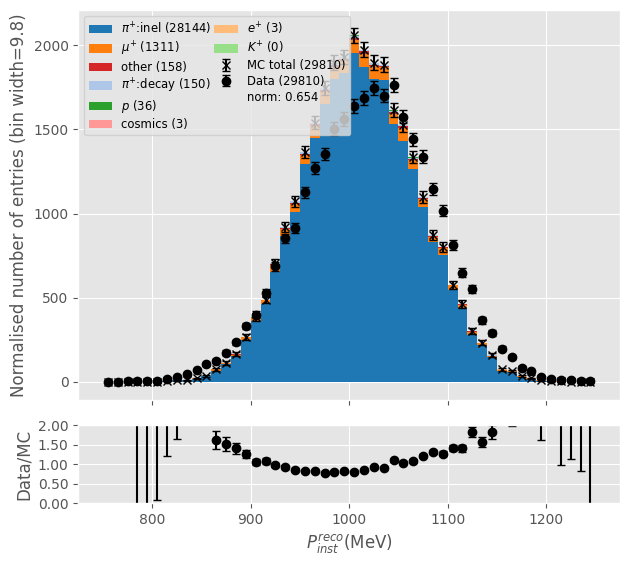

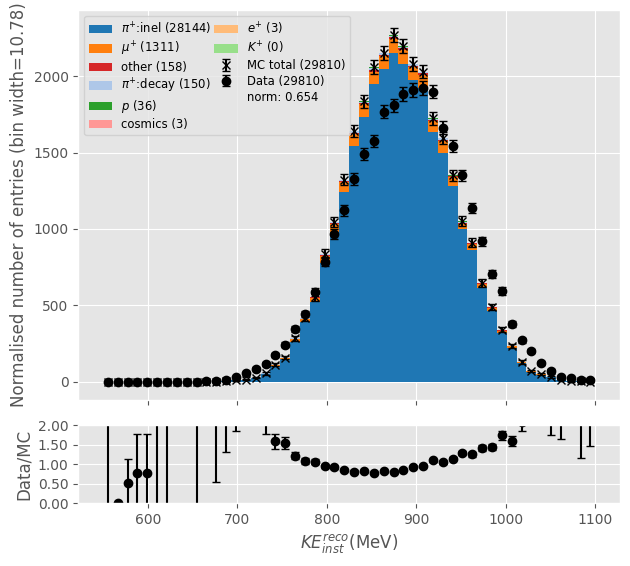

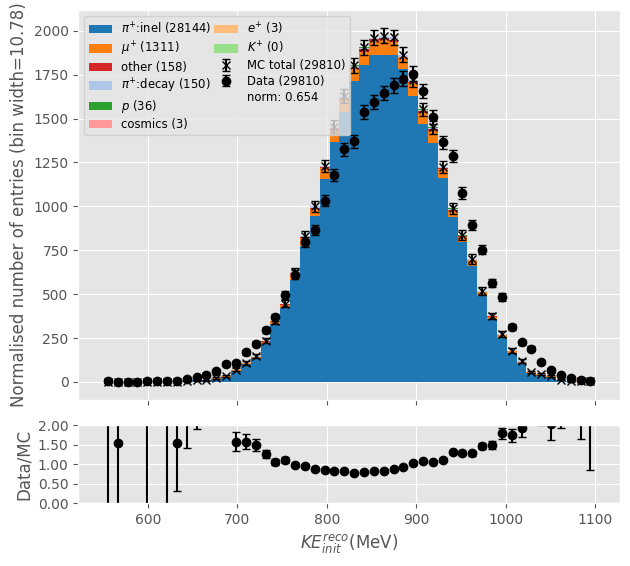

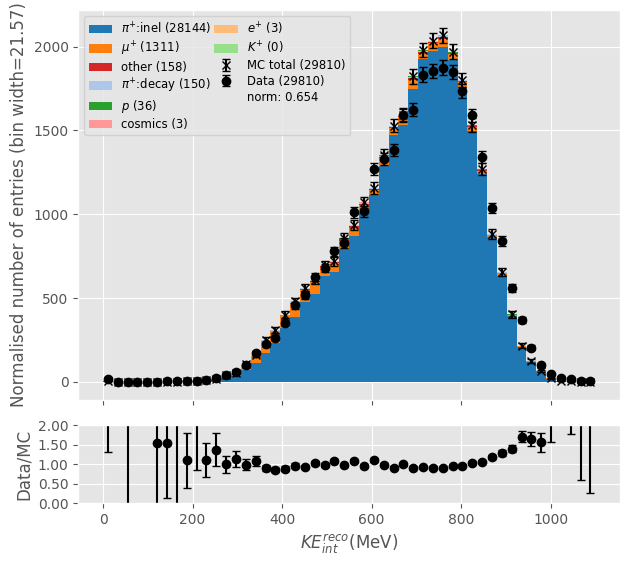

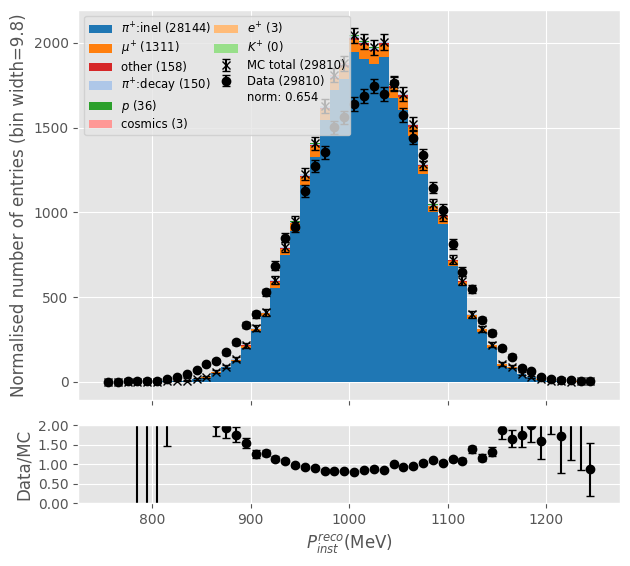

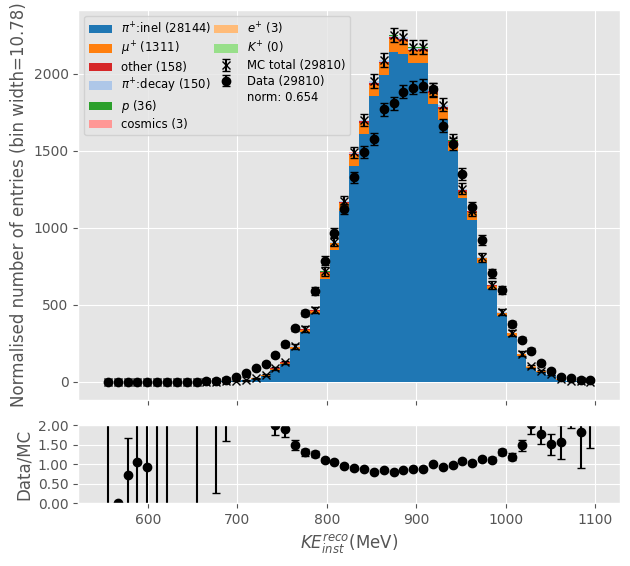

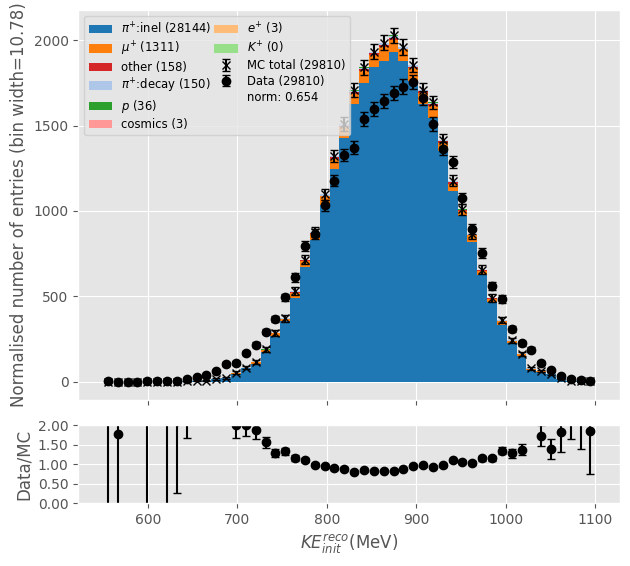

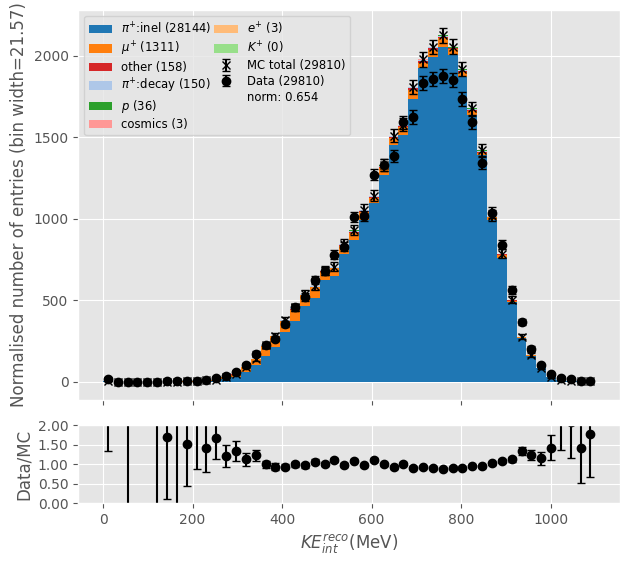

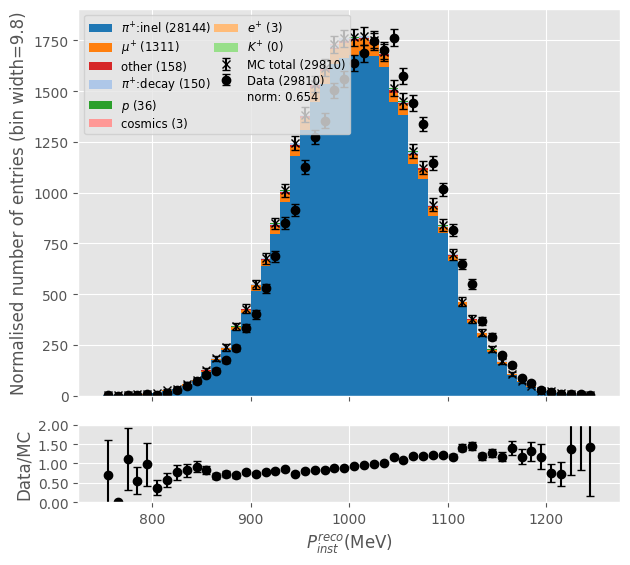

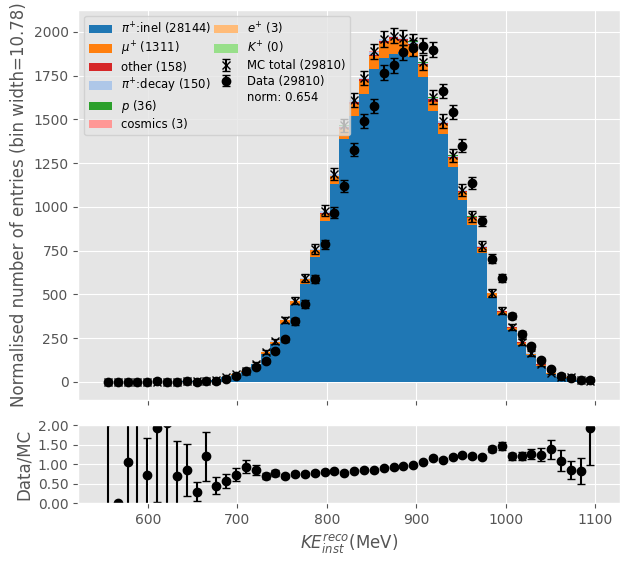

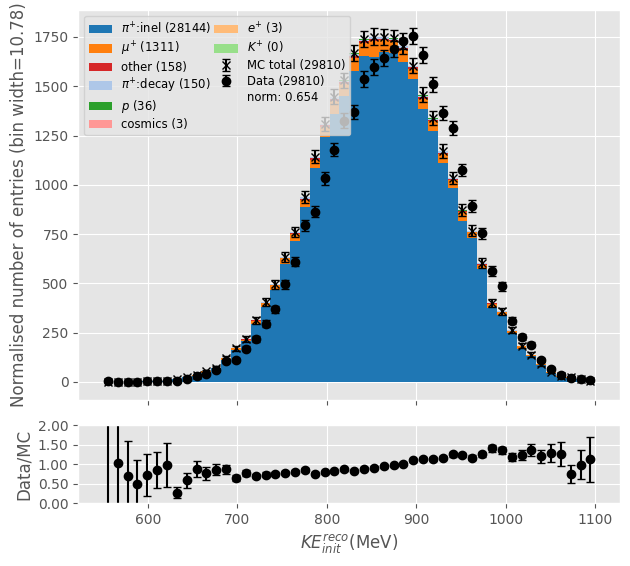

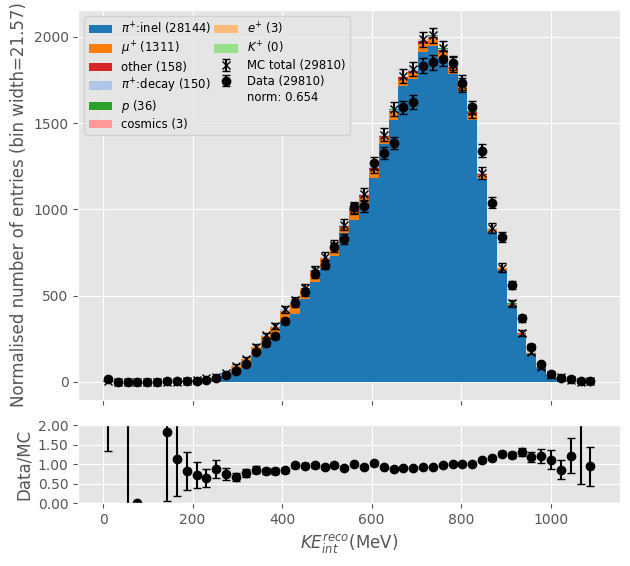

In [28]:
def MakePlots(pion_sample : dict[Master.Data], reco_KEs : dict[dict[np.array]], weights : np.array = None, smearing : np.array = None, book : Plots.PlotBook = Plots.PlotBook.null):
    if smearing is None:
        smearing = np.zeros(samples["mc"].eventNum)
    Plots.PlotTagged(pion_sample["mc"].recoParticles.beam_inst_P, Tags.GenerateTrueBeamParticleTags(pion_sample["mc"]), data2 = pion_sample["data"].recoParticles.beam_inst_P, bins = 50, data_weights = None, x_range = [750, 1250], norm = norm, loc = "upper left", x_label = "$P_{inst}^{reco}$(MeV)", data_weights = weights)
    book.Save()
    Plots.PlotTagged(reco_KEs["mc"]["reco_KE_inst"], Tags.GenerateTrueBeamParticleTags(pion_sample["mc"]), data2 = reco_KEs["data"]["reco_KE_inst"], bins = 50, data_weights = None, x_range = [550, 1100], norm = True, loc = "upper left", x_label = "$KE_{inst}^{reco}$(MeV)", data_weights = weights)
    book.Save()
    Plots.PlotTagged(reco_KEs["mc"]["reco_KE_ff"], Tags.GenerateTrueBeamParticleTags(pion_sample["mc"]), data2 = reco_KEs["data"]["reco_KE_ff"], bins = 50, data_weights = None, x_range = [550, 1100], norm = True, loc = "upper left", x_label = "$KE_{init}^{reco}$(MeV)", data_weights = weights)
    book.Save()    
    Plots.PlotTagged(reco_KEs["mc"]["reco_KE_int"], Tags.GenerateTrueBeamParticleTags(pion_sample["mc"]), data2 = reco_KEs["data"]["reco_KE_int"], bins = 50, data_weights = None, x_range = [0, 1100], norm = True, loc = "upper left", x_label = "$KE_{int}^{reco}$(MeV)", data_weights = weights)
    book.Save()
    return

with Plots.PlotBook("pion_nominal.pdf", True) as book:
    MakePlots(pion_sample, reco_KE_unsmeared, None, None, book)

with Plots.PlotBook("pion_reweight.pdf", True) as book:
    MakePlots(pion_sample, reco_KE_unsmeared, weights_pion_sample, None, book)

with Plots.PlotBook("pion_reweight_smeared.pdf", True) as book:
    MakePlots(pion_sample, reco_KE_unsmeared, weights_pion_sample, smearing_mc_pions, book)


/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1176: RuntimeWarning: divide by zero encountered in divide
  ratio = h_data / h_mc # data / MC
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1177: RuntimeWarning: invalid value encountered in divide
  ratio_err = ratio * np.sqrt((data_err/h_data)**2 + (mc_error/h_mc)**2)


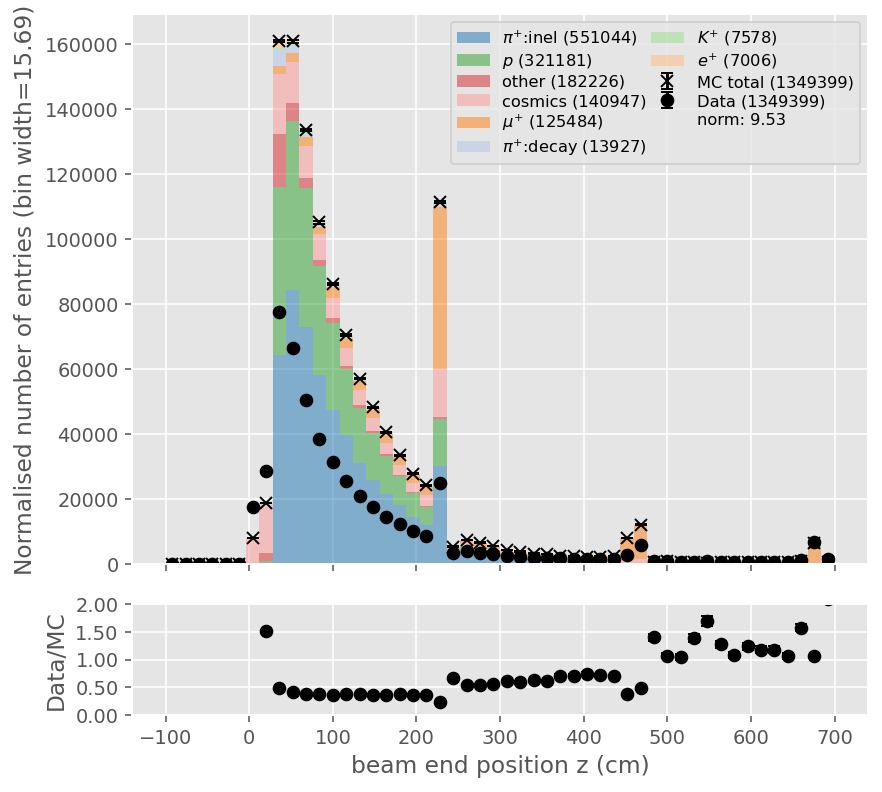

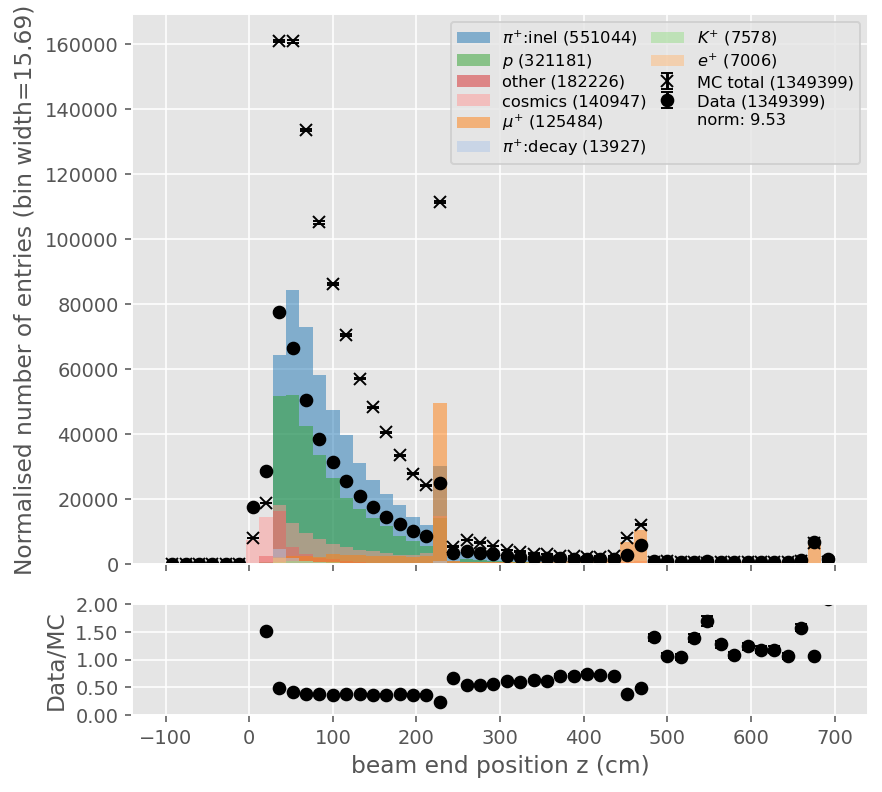

In [3]:
Plots.PlotTagged(mc.recoParticles.beam_endPos.z, Tags.GenerateTrueBeamParticleTags(mc), data2 = data.recoParticles.beam_endPos.z, x_range = [-100, 700], norm = True, bins = 50, x_label = "beam end position z (cm)", stacked = True, alpha = 0.5)
Plots.PlotTagged(mc.recoParticles.beam_endPos.z, Tags.GenerateTrueBeamParticleTags(mc), data2 = data.recoParticles.beam_endPos.z, x_range = [-100, 700], norm = True, bins = 50, x_label = "beam end position z (cm)", stacked = False, alpha = 0.5)
# Plots.PlotTagged(mc.trueParticles.endPos.z[:, 0], Tags.GenerateTrueBeamParticleTags(mc), x_range = [-100, 700], norm = True, bins = 50, x_label = "true beam end position z (cm)")

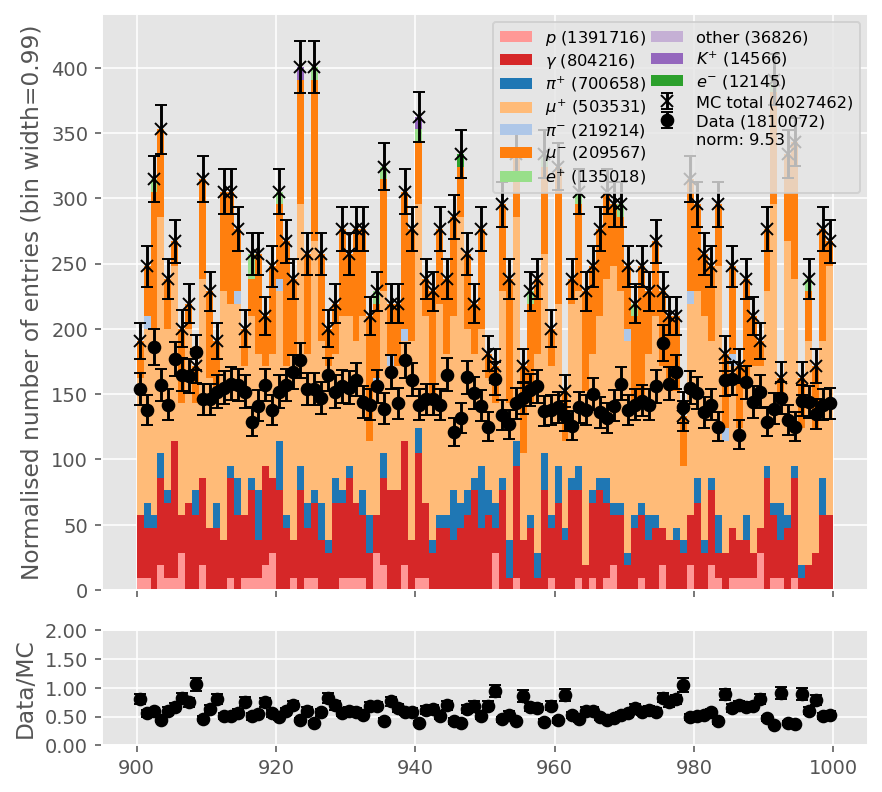

In [4]:
event_normalisation = ak.count(data.eventNum) / ak.count(mc.eventNum)
pfo_normalisation = ak.count(data.recoParticles.number) / ak.count(mc.recoParticles.number)
Plots.PlotTagged(mc.recoParticles.shower_energy, Tags.GenerateTrueParticleTags(mc), data2 = data.recoParticles.shower_energy, y_scale = "linear", norm = event_normalisation, x_range = [900, 1000])

In [4]:
Tags.GenerateTrueParticleTagsPi0Shower(samples["mc"])

{'$\\gamma$': Tag(name='$\\gamma$', name_simple='$\\gamma$', colour='C0', mask=<Array [[], [], [False, ... False], [False]] type='141548 * var * bool'>, number=0),
 '$\\gamma$:beam $\\pi^0$': Tag(name='$\\gamma$:beam $\\pi^0$', name_simple='$\\gamma$:beam $\\pi^0$', colour='C1', mask=<Array [[], [], [False, ... False], [False]] type='141548 * var * bool'>, number=1),
 '$\\gamma$:other $\\pi^0$': Tag(name='$\\gamma$:other $\\pi^0$', name_simple='$\\gamma$:other $\\pi^0$', colour='C2', mask=<Array [[], [], [False, ... False], [False]] type='141548 * var * bool'>, number=2),
 '$\\pi^{+}$': Tag(name='$\\pi^{+}$', name_simple='$\\pi^{+}$', colour='C3', mask=<Array [[], [], [False, ... True], [True]] type='141548 * var * bool'>, number=3),
 '$\\pi^{-}$': Tag(name='$\\pi^{-}$', name_simple='$\\pi^{-}$', colour='C4', mask=<Array [[], [], [False, ... False], [False]] type='141548 * var * bool'>, number=4),
 '$\\mu^{-}$': Tag(name='$\\mu^{-}$', name_simple='$\\mu^{-}$', colour='C5', mask=<Array 

# Beam Particle Selection

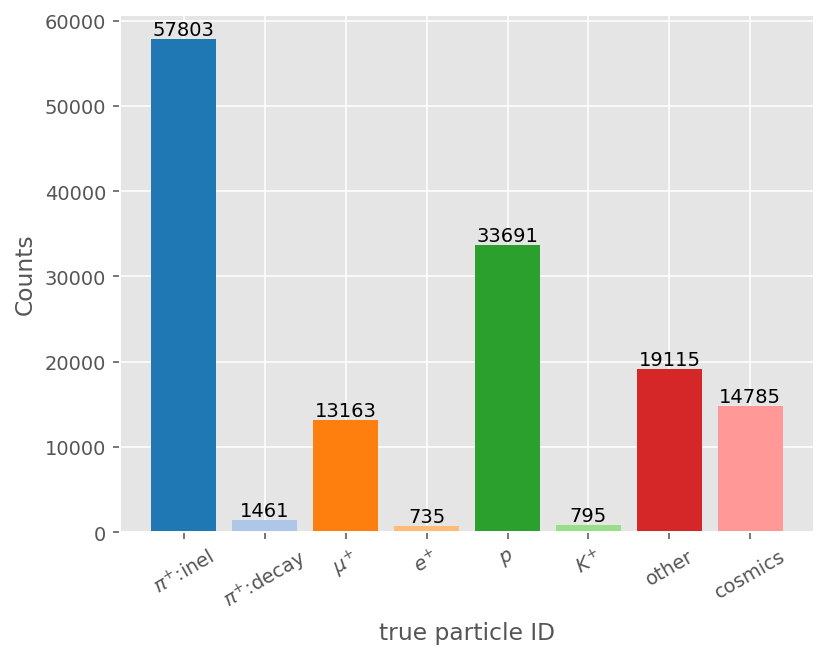

In [36]:
masks = {
    "mc" : BeamParticleSelection.PiBeamSelection(samples["mc"]),
    "data" : BeamParticleSelection.PiBeamSelection(samples["data"], use_beam_inst = True)
}

Plots.PlotTags(Tags.GenerateTrueBeamParticleTags(samples["mc"]), "true particle ID")

FilterSamples(samples, masks)

In [ ]:
masks = {s : BeamParticleSelection.CaloSizeCut(samples[s]) for s in samples}
FilterSamples(samples, masks)

In [ ]:
masks = {s : BeamParticleSelection.PandoraTagCut(samples[s]) for s in samples}

if data is None:
    Plots.PlotBar(samples["mc"])
else:
    Plots.PlotBarComparision(samples["mc"].recoParticles.beam_pandora_tag, samples["data"].recoParticles.beam_pandora_tag, label_1 = "MC", label_2 = "Data", xlabel = "pandora beam tag", fraction = True, barlabel = True)

FilterSamples(samples, masks)

In [ ]:
def norm(x, mu, sigma):
    return (x - mu) / sigma

# Beam quality cuts
for i in ["x", "y", "z"]:
    Plots.PlotTagged(mc.recoParticles.beam_startPos_SCE[i], Tags.GenerateTrueBeamParticleTags(mc), data2 = data.recoParticles.beam_startPos_SCE[i], x_label = i + "(cm)", y_scale = "log", norm = True)

#* dxy cut
dxy = {s : (norm(samples[s].recoParticles.beam_startPos_SCE.x, beam_quality_fits[s]["mu_x"], beam_quality_fits[s]["sigma_x"])**2 + norm(samples[s].recoParticles.beam_startPos_SCE.y, beam_quality_fits[s]["mu_y"], beam_quality_fits[s]["sigma_y"])**2)**0.5 for s in samples}
masks = {s : dxy[s] < 3 for s in samples}

Plots.PlotTagged(dxy["mc"], Tags.GenerateTrueBeamParticleTags(mc), data2 = np.array(dxy["data"]), bins = 50, x_label = "$dxy$ (cm)", y_scale = "log", x_range = [0, 5], norm = True)
Plots.DrawCutPosition(3, arrow_length = 1, face = "left")

[print(f"dxy cut: {BeamParticleSelection.CountMask(masks[s])}") for s in masks]
FilterSamples(samples, masks)


In [ ]:
deltas_mc = {}
deltas_data = {}
for i in ["x", "y", "z"]:
    deltas_mc[i] = norm(samples["mc"].recoParticles.beam_startPos_SCE[i], beam_quality_fits["mc"][f"mu_{i}"], beam_quality_fits["mc"][f"sigma_{i}"])
    deltas_data[i] = norm(samples["data"].recoParticles.beam_startPos_SCE[i], beam_quality_fits["data"][f"mu_{i}"], beam_quality_fits["data"][f"sigma_{i}"])
    Plots.PlotTagged(deltas_mc[i], Tags.GenerateTrueBeamParticleTags(mc), data2 = np.array(deltas_data[i]), bins = 50, x_range = [-10, 10], y_scale = "log", x_label = f"$(" + i + "- \mu_{"+ i + "} )/ \sigma_{" + i + "}$", ncols = 3, norm = True)
    Plots.DrawCutPosition(-3, arrow_length = 1, face = "right")
    Plots.DrawCutPosition(3, arrow_length = 1, face = "left")


masks = {
    "mc" : (deltas_mc["z"] > -3) & (deltas_mc["z"] < 3),
    "data" : (deltas_data["z"] > -3) & (deltas_data["z"] < 3)
}

FilterSamples(samples, masks)

In [ ]:
beam_dir = {s : vector.normalize(vector.sub(samples[s].recoParticles.beam_endPos_SCE, samples[s].recoParticles.beam_startPos_SCE)) for s in samples}

beam_dir_mu = {s : vector.normalize(vector.vector(beam_quality_fits[s]["mu_dir_x"], beam_quality_fits[s]["mu_dir_y"], beam_quality_fits[s]["mu_dir_z"])) for s in beam_quality_fits}

beam_costh = {s : vector.dot(beam_dir[s], beam_dir_mu[s]) for s in beam_dir_mu}

Plots.PlotTagged(beam_costh["mc"], Tags.GenerateTrueBeamParticleTags(mc), data2 = np.array(beam_costh["data"]), x_label = "$\cos(\\theta)$", y_scale = "log", bins = 50, x_range = [0.9, 1], norm = True)
Plots.DrawCutPosition(0.95, arrow_length = 0.02)

masks = {s : beam_costh[s] > 0.95 for s in samples}
FilterSamples(samples, masks)

In [ ]:
Plots.PlotTagged(samples["mc"].recoParticles.beam_endPos_SCE.z, Tags.GenerateTrueBeamParticleTags(samples["mc"]), data2 = samples["data"].recoParticles.beam_endPos.z, x_label = "Beam end position z (cm)", norm = args.norm, bins = 50, y_scale = "log", ncols = 1)
Plots.DrawCutPosition(220, face = "left", arrow_length = 50)

masks = {s : BeamParticleSelection.APA3Cut(samples[s]) for s in samples}

FilterSamples(samples, masks)

In [ ]:
# michel score cut

scores = {}
for s in samples:
    score = ak.where(samples[s].recoParticles.beam_nHits != 0, samples[s].recoParticles.beam_michelScore / samples[s].recoParticles.beam_nHits, -999)
    masks[s] = BeamParticleSelection.MichelScoreCut(samples[s])
    scores[s] = score

Plots.PlotTagged(scores["mc"], Tags.GenerateTrueBeamParticleTags(samples["mc"]), data2 = np.array(scores["data"]), x_range = (0, 1), y_scale = "log", bins = 50, x_label = "michel score", ncols = 3, norm = args.norm)
Plots.DrawCutPosition(0.55, face = "left")

FilterSamples(samples, masks)

In [ ]:
median = {s : PFOSelection.Median(samples[s].recoParticles.beam_dEdX) for s in samples}

Plots.PlotTagged(median["mc"], Tags.GenerateTrueBeamParticleTags(samples["mc"]), data2 = median["data"], y_scale = "log", x_range = [0, 10], x_label = "median $dE/dX$ (MeV/cm)", norm = True)
Plots.DrawCutPosition(2.4, face = "left", arrow_length = 2)

masks = {s : BeamParticleSelection.MedianDEdXCut(samples[s]) for s in samples}
FilterSamples(samples, masks)

In [ ]:
a = {"mc" : "mc_arguments", "data" : "data_arguments"}
masks = {s : BeamParticleSelection.BeamScraperCut(samples[s], args.beam_selection[a[s]]["BeamScraperCut"]["KE_range"], args.beam_selection[a[s]]["BeamScraperCut"]["fits"], args.beam_selection[a[s]]["BeamScraperCut"]["pdg_hyp"], args.beam_selection[a[s]]["BeamScraperCut"]["cut"]) for s in samples}

nx = {s : norm(samples[s].recoParticles.beam_inst_pos.x, ak.mean(samples[s].recoParticles.beam_inst_pos.x), ak.std(samples[s].recoParticles.beam_inst_pos.x)) for s in samples}
ny = {s : norm(samples[s].recoParticles.beam_inst_pos.y, ak.mean(samples[s].recoParticles.beam_inst_pos.y), ak.std(samples[s].recoParticles.beam_inst_pos.y)) for s in samples}

r = {s : (nx[s]**2 + ny[s]**2)**0.5 for s in samples}

Plots.PlotTagged(r["mc"], data2 = r["data"], tags = Tags.GenerateTrueBeamParticleTags(samples["mc"]), norm = True)
Plots.DrawCutPosition(args.beam_selection[a[s]]["BeamScraperCut"]["cut"], arrow_length = 1, face = "left", arrow_loc = 0.6)

FilterSamples(samples, masks)

In [ ]:
samples["mc"].cutTable.get_table()

In [ ]:
samples["data"].cutTable.get_table()

# Quick Beam Selection

In [4]:
for s in args.beam_selection["selections"]:
    mc_mask = args.beam_selection["selections"][s](samples["mc"], **args.beam_selection["mc_arguments"][s])
    samples["mc"].Filter([mc_mask], [mc_mask])
    data_mask = args.beam_selection["selections"][s](samples["data"], **args.beam_selection["data_arguments"][s])
    samples["data"].Filter([data_mask], [data_mask])

print(samples["mc"].cutTable.get_table(pfos = False, percent_remain = False, relative_percent = False, ave_per_event = False))
print(samples["data"].cutTable.get_table(pfos = False, percent_remain = False, relative_percent = False, ave_per_event = False))

masks = {s : PFOSelection.GoodShowerSelection(samples[s]) for s in samples}
FilterSamples(samples, masks, True)

print(samples["mc"].cutTable.get_table(events = False, percent_remain = False, relative_percent = False, ave_per_event = False))
print(samples["data"].cutTable.get_table(events = False, percent_remain = False, relative_percent = False, ave_per_event = False))

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filters.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filename.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to nTuple_type.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/anaconda3/envs/python3_10_0/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered in divide
  result = getattr(ufunc, method)(
/home/sb16165/anaconda3/envs/python3_10_0/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in divide
  result = getattr(ufunc, method)(


Name  Remaining events
0   Initial data            141548
1              -            102443
2              -             91248
3              -             87403
4              -             68150
5              -             62438
6              -             59985
7              -             48795
8              -             48575
9              -             46726
10             -             30016

Name  Remaining events
0   Initial data           1349399
1              -            285238
2              -            248398
3              -            232423
4              -            181810
5              -            174422
6              -            162761
7              -            124320
8              -            123883
9              -            117662
10             -             74352

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filters.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _RecoParticleData__beam_caloWire.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _RecoParticleData__beam_pandora_tag.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _RecoParticleData__beam_startPos_SCE.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _RecoParticleData__beam_endPos_SCE.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/

Name  Remaining PFOs
0   Initial data          422469
1              -          339292
2              -          330673
3              -          317779
4              -          242725
5              -          222475
6              -          215150
7              -          182476
8              -          181732
9              -          176298
10             -          114333
11             -          101704

Name  Remaining PFOs
0   Initial data         1810072
1              -          936036
2              -          897614
3              -          839940
4              -          638385
5              -          612478
6              -          575570
7              -          484694
8              -          483234
9              -          464163
10             -          298326
11             -          263254

In [19]:
args.piplus_selection["selections"]

photon_mask = EventSelection.SelectionTools.CombineSelections(samples["mc"], list(args.piplus_selection["selections"].values()), 1, list(args.piplus_selection["mc_arguments"].values()))

In [26]:
pi0_args = args.pi0_selection
for s in pi0_args["mc_arguments"]:
    pi0_args["mc_arguments"][s]["photon_mask"] = photon_mask
print(pi0_args)

{
    'selections': {
        'NPhotonCandidateSelection': <function NPhotonCandidateSelection at 0x7f9bde58fbe0>,
        'Pi0MassSelection': <function Pi0MassSelection at 0x7f9bde58fd00>,
        'Pi0OpeningAngleSelection': <function Pi0OpeningAngleSelection at 0x7f9bde58fc70>
    },
    'mc_arguments': {
        'NPhotonCandidateSelection': {
            'cut': 2,
            'photon_mask': <Array [[False], ... False, False, False]] type='30016 * var * bool'>
        },
        'Pi0MassSelection': {
            'cut': [50, 250],
            'correction': <staticmethod(<function EnergyCorrection.ResponseCorrection at 0x7f9bde1b1510>)>,
            'correction_params': {'p0': 0.15514869965129238, 'p1': 22.848092032157204, 'p2': -1.0621258640813378},
            'photon_mask': <Array [[False], ... False, False, False]] type='30016 * var * bool'>
        },
        'Pi0OpeningAngleSelection': {
            'cut': [10, 80],
            'photon_mask': <Array [[False], ... False, False, False]] type='30016 * var * bool'>
        }
    },
    'data_arguments': {
        'NPhotonCandidateSelection': {'cut': 2},
        'Pi0MassSelection': {
            'cut': [50, 250],
            'correction': <staticmethod(<function EnergyCorrection.ResponseCorrection at 0x7f9bde1b1510>)>,
            'correction_params': {'p0': 0.15514869965129238, 'p1': 22.848092032157204, 'p2': -1.0621258640813378}
        },
        'Pi0OpeningAngleSelection': {'cut': [10, 80]}
    }
}

In [27]:
pi0_mask = EventSelection.SelectionTools.CombineSelections(samples["mc"], list(args.pi0_selection["selections"].values()), 1, list(args.pi0_selection["mc_arguments"].values()))


/home/sb16165/anaconda3/envs/python3_10_0/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(
/home/sb16165/anaconda3/envs/python3_10_0/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in power
  result = getattr(ufunc, method)(


[50, 250]


# $\pi^{+}$ Particle Selection

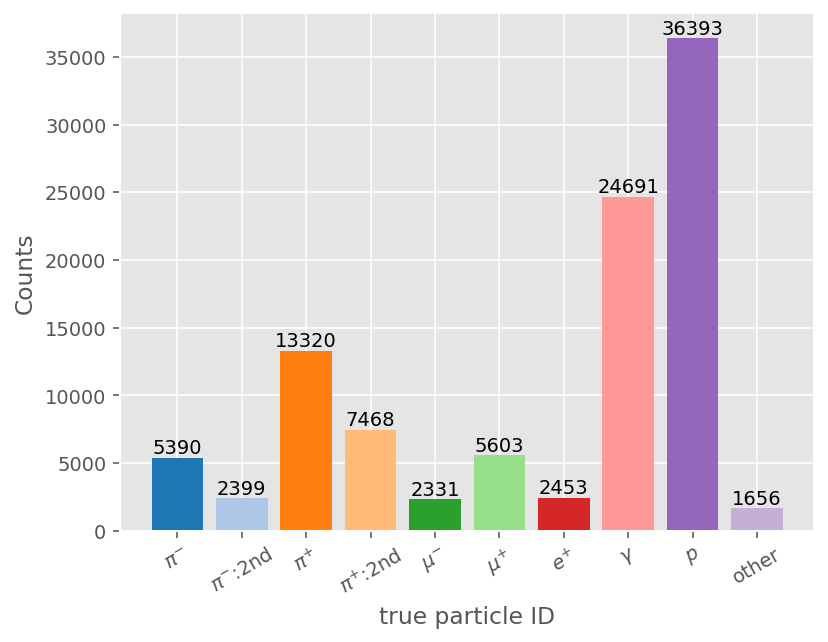

In [39]:
Plots.PlotTags(Tags.GenerateTrueParticleTagsPiPlus(samples["mc"]), "true particle ID")

In [ ]:
# only for my ntuples
masks = {s : PFOSelection.BeamDaughterCut(samples[s]) for s in samples}
Plots.PlotTagged(samples["mc"].recoParticles.track_score, Tags.GenerateTrueParticleTags(samples["mc"]), data2 = samples["data"].recoParticles.track_score, y_scale = "log", x_label = "track score", norm = True)


/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filters.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _RecoParticleData__beam_caloWire.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _RecoParticleData__beam_pandora_tag.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _RecoParticleData__beam_startPos_SCE.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _RecoParticleData__beam_endPos_SCE.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/

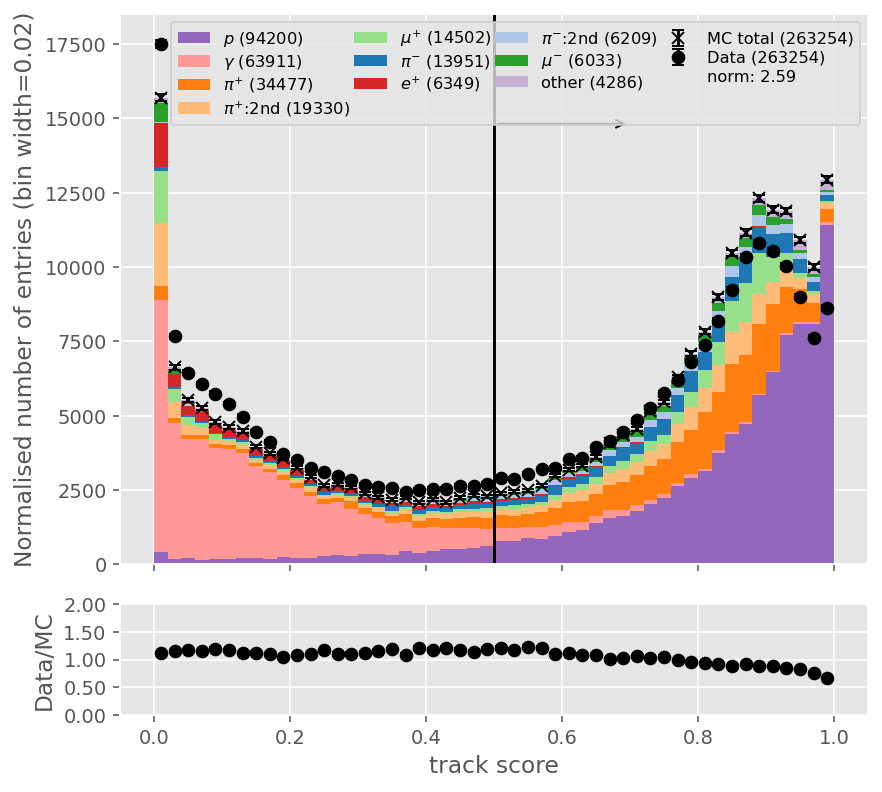

In [40]:
Plots.PlotTagged(samples["mc"].recoParticles.track_score, Tags.GenerateTrueParticleTagsPiPlus(samples["mc"]), data2 = samples["data"].recoParticles.track_score, y_scale = "linear", bins = 50, ncols = 4, x_label = "track score", norm = True)
Plots.DrawCutPosition(0.5, face = "right")

masks = {s : PFOSelection.TrackScoreCut(samples[s]) for s in samples}
FilterSamples(samples, masks, True)

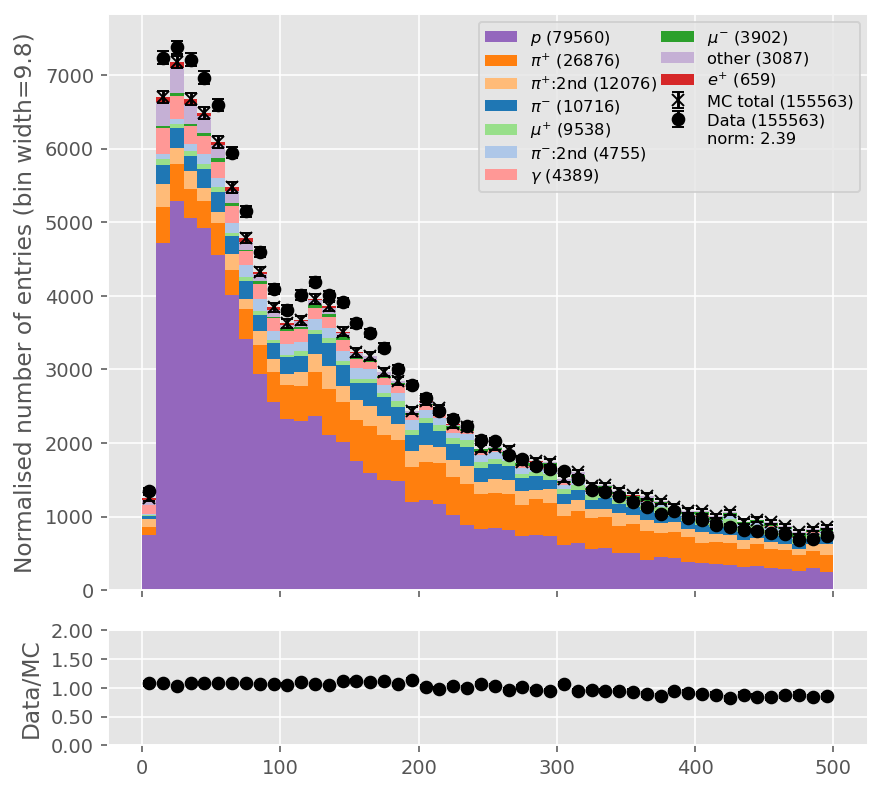

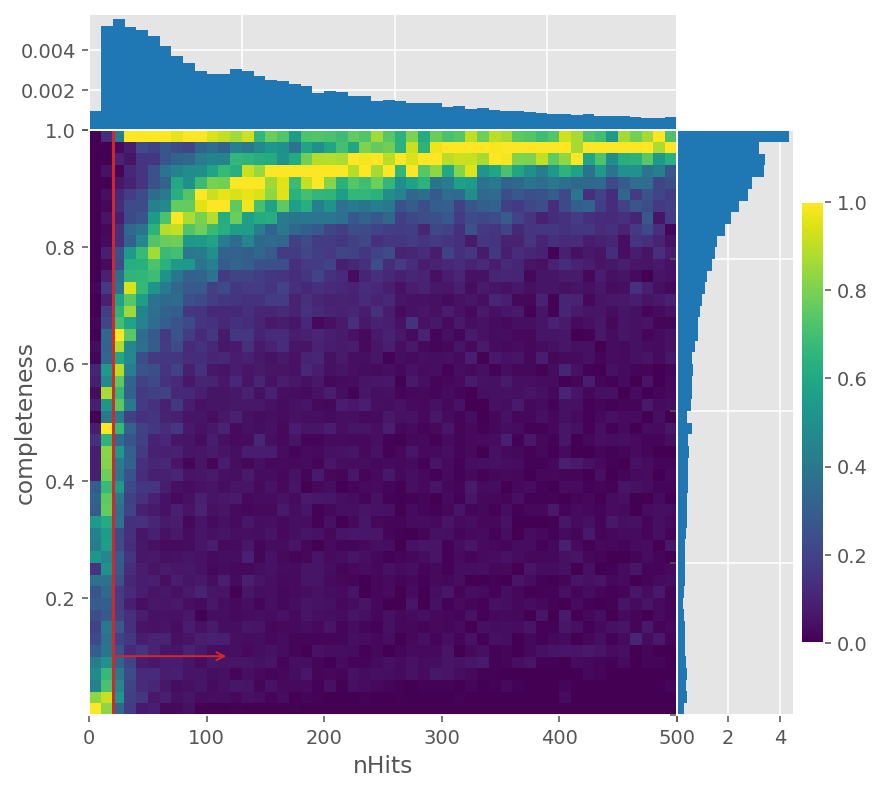

In [41]:
Plots.PlotTagged(samples["mc"].recoParticles.n_hits, Tags.GenerateTrueParticleTagsPiPlus(samples["mc"]), data2 = samples["data"].recoParticles.n_hits, bins = 50, ncols = 2, x_range = [0, 500], norm = True)
# Plots.PlotHist2D(ak.ravel(samples["mc"].trueParticlesBT.completeness), ak.ravel(samples["mc"].recoParticles.n_hits), xlabel = "completeness", ylabel = "n_hits", y_range = [0, 500], bins = 50)

Plots.PlotHist2DImshowMarginal(ak.ravel(samples["mc"].recoParticles.n_hits), ak.ravel(samples["mc"].trueParticlesBT.completeness), ylabel = "completeness", xlabel = "n_hits", x_range = [0, 500], bins = 50, norm = "column", c_scale = "linear")
Plots.DrawCutPosition(20, arrow_length = 100, arrow_loc = 0.1, color = "C6")

masks = {s : PFOSelection.NHitsCut(samples[s], 20) for s in samples}
FilterSamples(samples, masks, True)

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1235: RuntimeWarning: invalid value encountered in divide
  ratio = h_data / h_mc # data / MC
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1236: RuntimeWarning: invalid value encountered in divide
  ratio_err = ratio * np.sqrt((data_err/h_data)**2 + (mc_error/h_mc)**2)


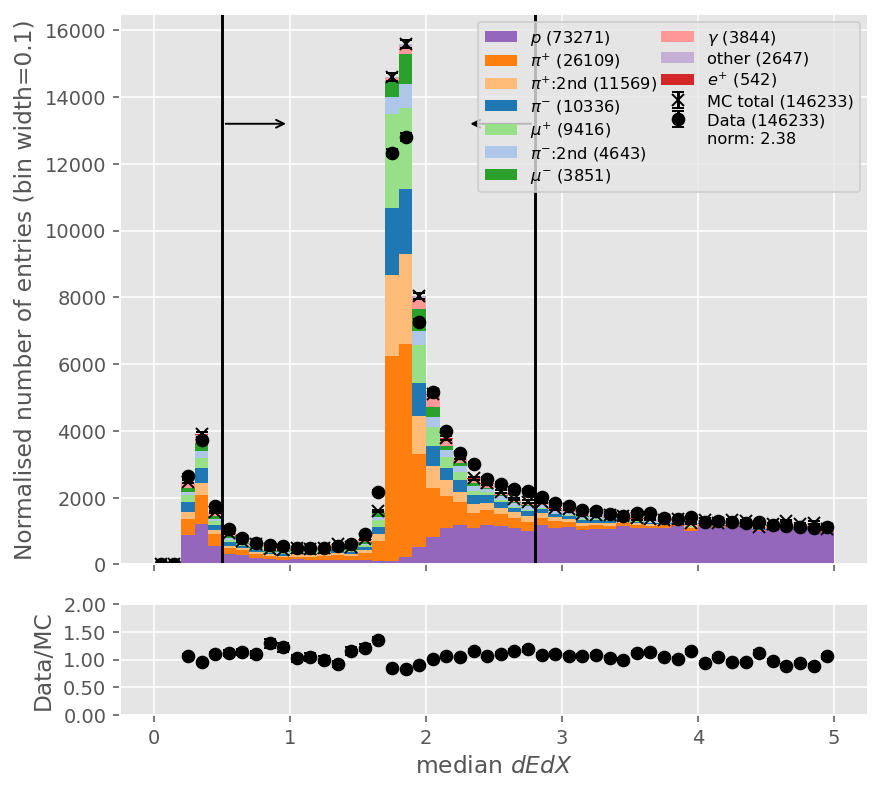

In [42]:
median_dEdX = {s : PFOSelection.Median(samples[s].recoParticles.track_dEdX) for s in samples}
Plots.PlotTagged(median_dEdX["mc"], Tags.GenerateTrueParticleTagsPiPlus(samples["mc"]), data2 = median_dEdX["data"], ncols = 2, x_range = [0, 5], x_label = "median $dEdX$", bins = 50, norm = True)

Plots.DrawCutPosition(0.5, arrow_length = 0.5, face = "right")
Plots.DrawCutPosition(2.8, arrow_length = 0.5, face = "left")

masks = {s : PFOSelection.PiPlusSelection(samples[s]) for s in samples}
FilterSamples(samples, masks, True)

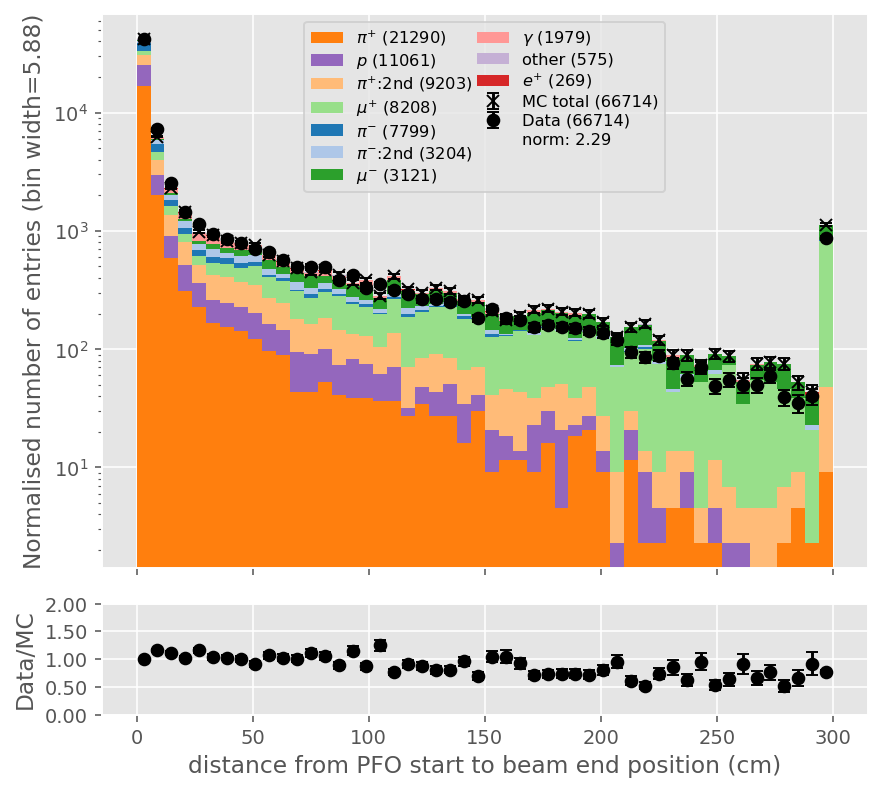

In [43]:
dist = {s : vector.dist(samples[s].recoParticles.shower_start_pos, samples[s].recoParticles.beam_endPos) for s in samples}
Plots.PlotTagged(dist["mc"], Tags.GenerateTrueParticleTagsPiPlus(samples["mc"]), data2 = dist["data"], bins = 50, x_label = "distance from PFO start to beam end position (cm)", ncols = 2, loc = "upper center", norm = True, stacked = "descending", truncate = True, y_scale = "log", x_range = [0, 300])

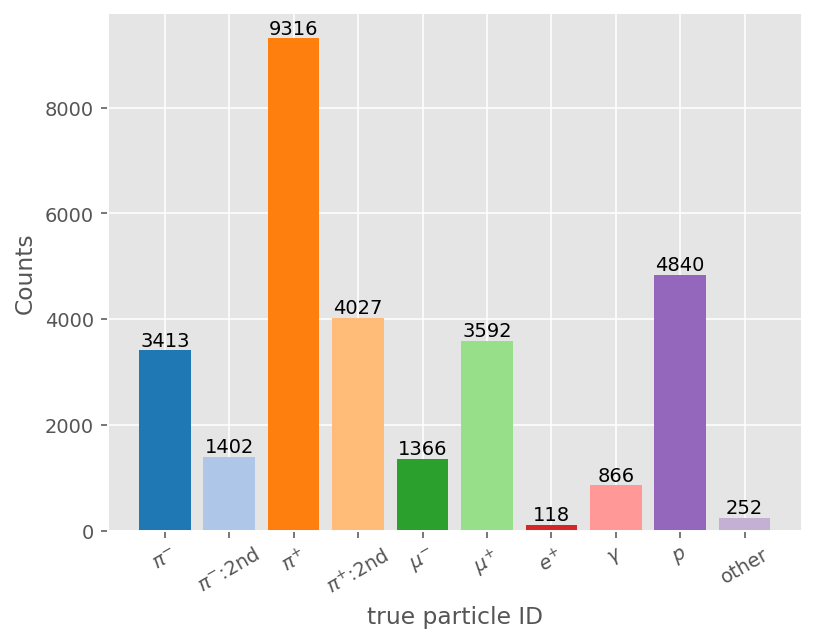

In [44]:
Plots.PlotTags(Tags.GenerateTrueParticleTagsPiPlus(samples["mc"]), "true particle ID")

# photon candidate selection

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filters.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _RecoParticleData__beam_caloWire.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _RecoParticleData__beam_pandora_tag.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _RecoParticleData__beam_startPos_SCE.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _RecoParticleData__beam_endPos_SCE.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/

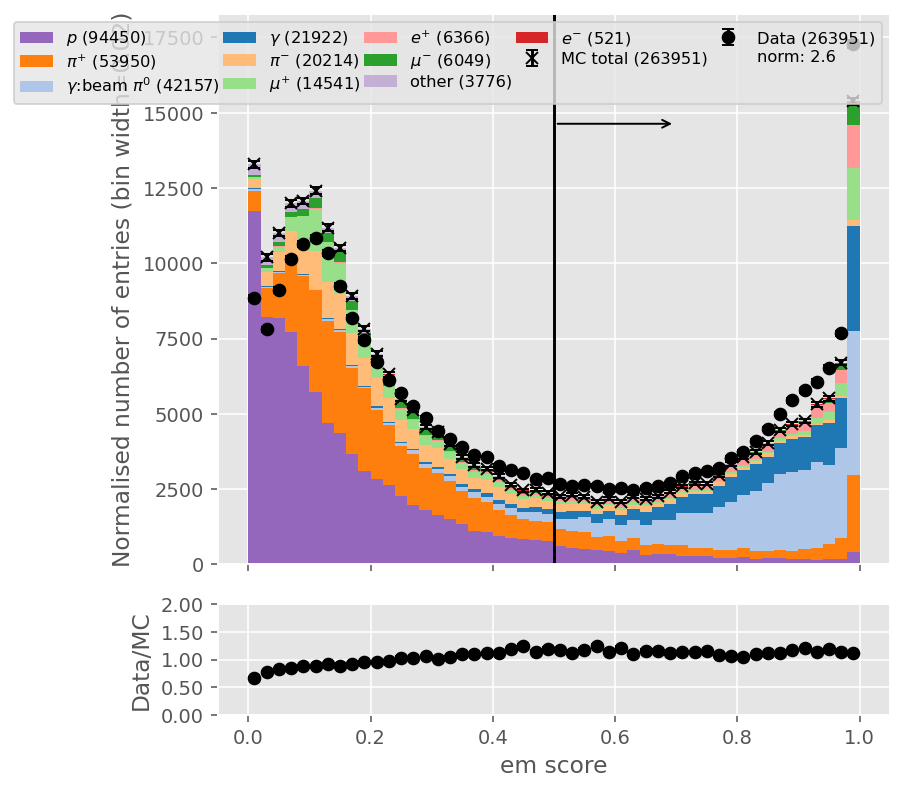

In [4]:
Plots.PlotTagged(samples["mc"].recoParticles.em_score, Tags.GenerateTrueParticleTagsPi0Shower(samples["mc"]), data2 = samples["data"].recoParticles.em_score, bins = 50, x_range = [0, 1], ncols = 5, x_label = "em score", norm = True)
Plots.DrawCutPosition(0.5)

masks = {s : PFOSelection.EMScoreCut(samples[s], 0.5) for s in samples}
FilterSamples(samples, masks, True)

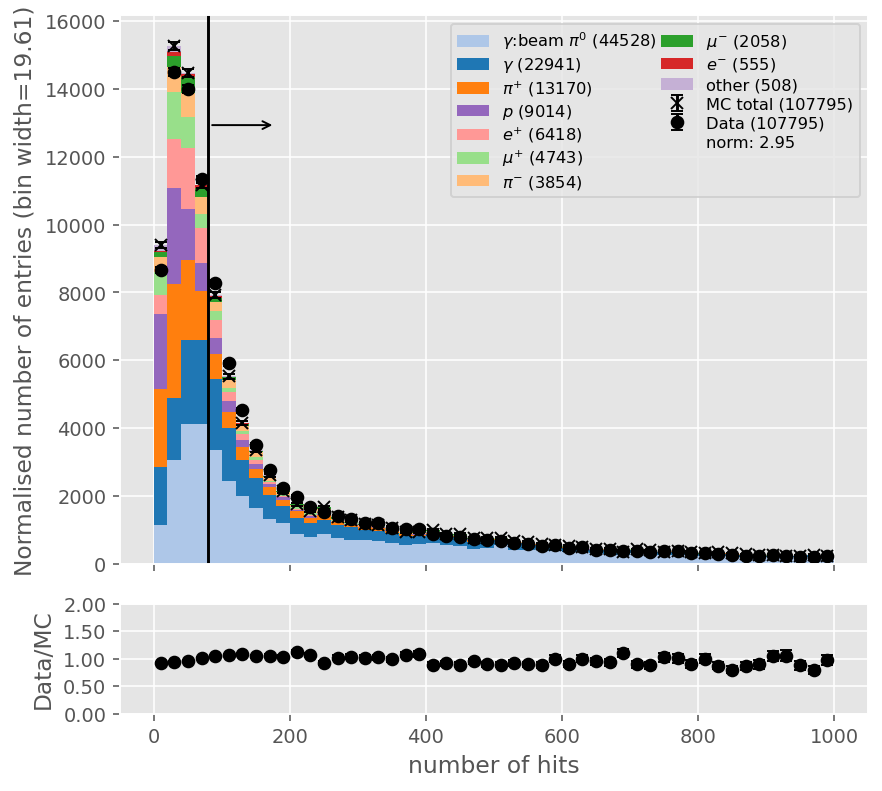

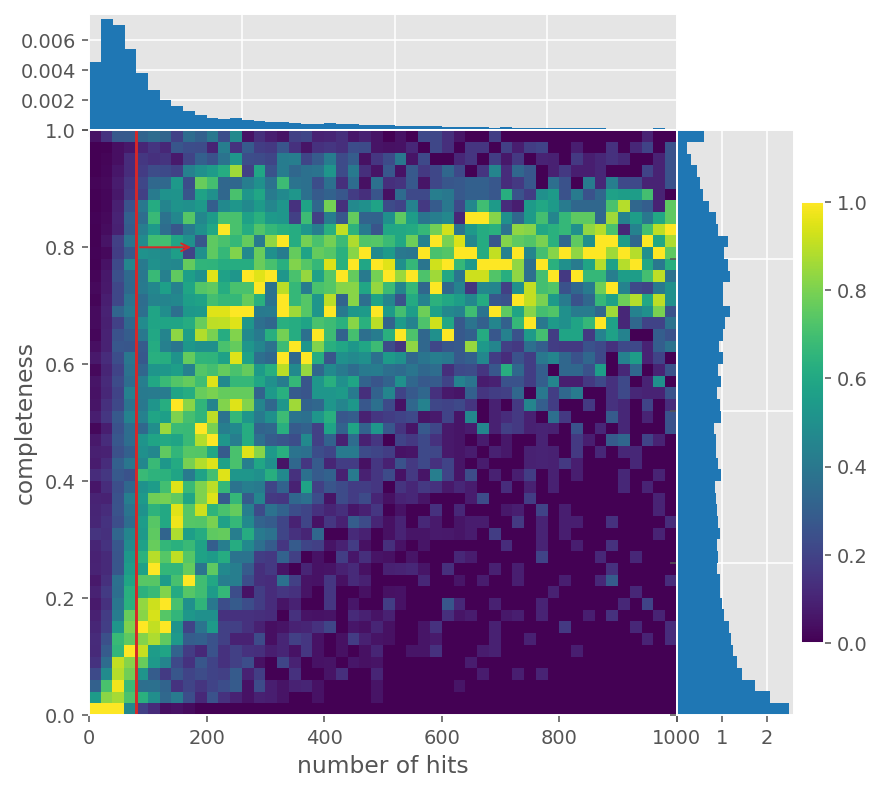

In [5]:
Plots.PlotTagged(samples["mc"].recoParticles.n_hits, Tags.GenerateTrueParticleTagsPi0Shower(samples["mc"]), data2 = samples["data"].recoParticles.n_hits, bins = 50, x_label = "number of hits", x_range = [0, 1000], norm = True)
Plots.DrawCutPosition(80, arrow_length = 100)

Plots.PlotHist2DImshowMarginal(ak.ravel(samples["mc"].recoParticles.n_hits), ak.ravel(samples["mc"].trueParticlesBT.completeness), bins = 50, y_range = [0, 1],x_range = [0, 1000], ylabel = "completeness", xlabel = "number of hits", norm = "column")
Plots.DrawCutPosition(80, flip = False, arrow_length = 100, color = "C6")

masks = {s : PFOSelection.NHitsCut(samples[s], 80) for s in samples}
FilterSamples(samples, masks, True)

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _RecoParticleData__beam_endPos.
  warnings.warn(f"Couldn't apply filters to {var}.")


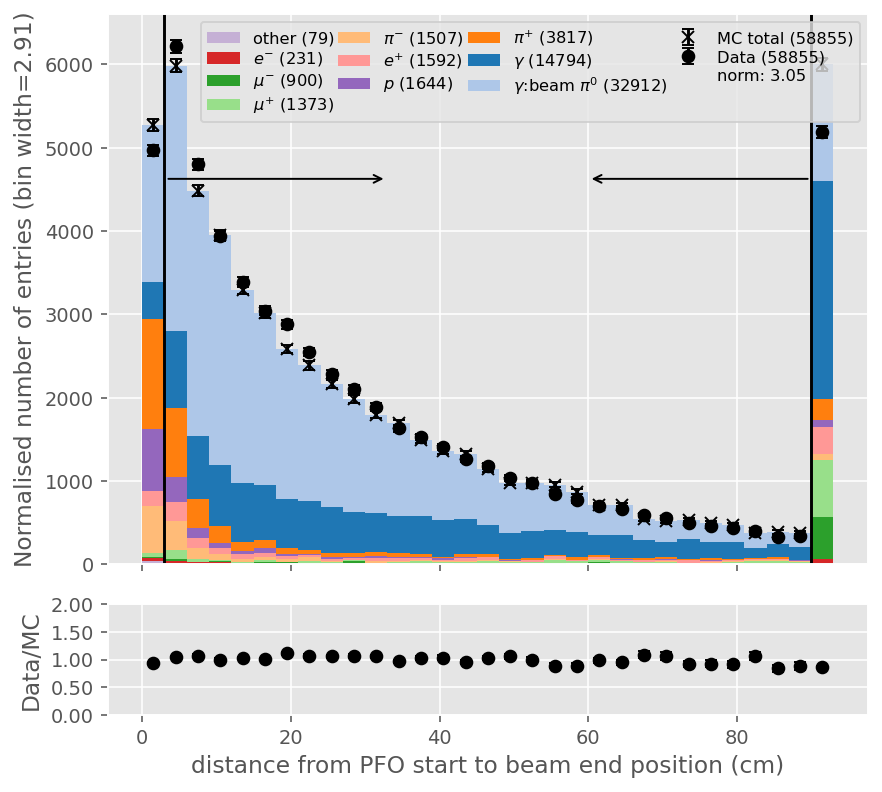

In [6]:
dist = {s : vector.dist(samples[s].recoParticles.shower_start_pos, samples[s].recoParticles.beam_endPos) for s in samples}

Plots.PlotTagged(dist["mc"], Tags.GenerateTrueParticleTagsPi0Shower(samples["mc"]), data2 = dist["data"], bins = 31, x_range = [0, 93], x_label = "distance from PFO start to beam end position (cm)", ncols = 4, norm = True, stacked = "ascending", truncate = True)
Plots.DrawCutPosition(3, arrow_length = 30, arrow_loc = 0.7)
Plots.DrawCutPosition(90, face = "left", arrow_length = 30, arrow_loc = 0.7)

masks = {s : PFOSelection.BeamParticleDistanceCut(samples[s], [3, 90]) for s in samples}
FilterSamples(samples, masks, True)

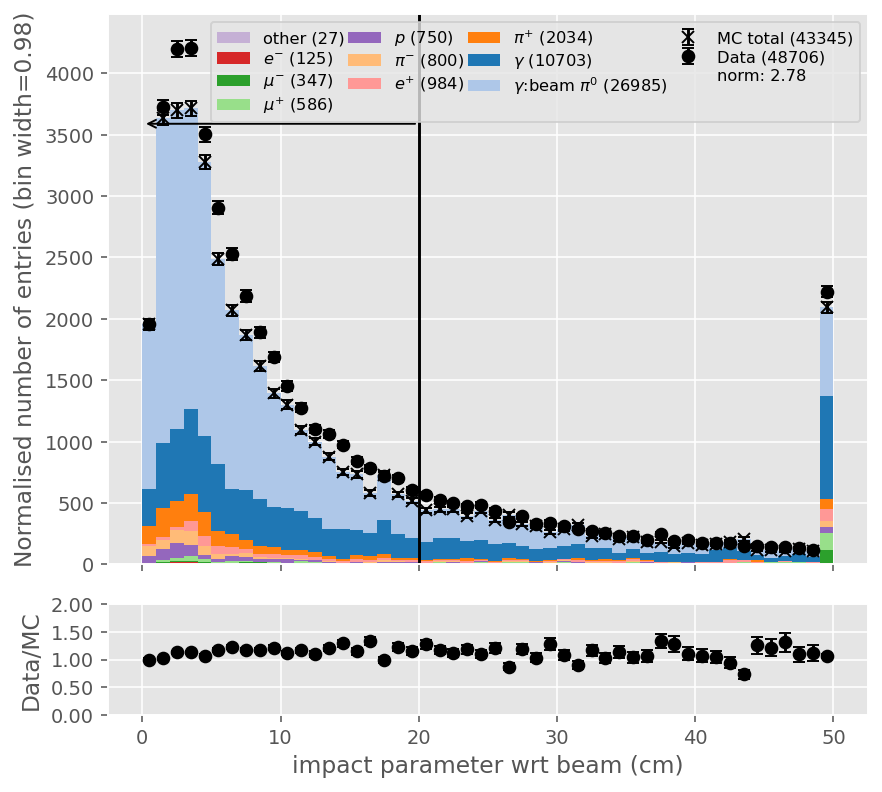

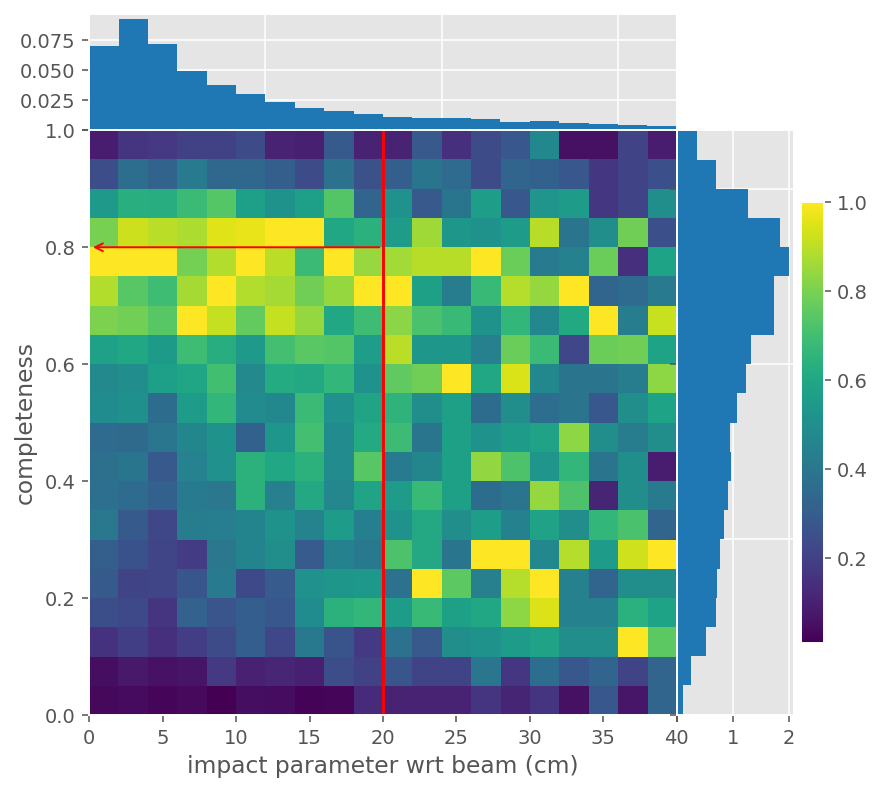

In [7]:
ip = {s : PFOSelection.find_beam_impact_parameters(samples[s]) for s in samples}

Plots.PlotTagged(ip["mc"], Tags.GenerateTrueParticleTagsPi0Shower(samples["mc"]), data2 = ip["data"], x_range = [0, 50], bins = 50, x_label = "impact parameter wrt beam (cm)", norm = args.norm, stacked = "ascending", ncols = 4, truncate = True)
Plots.DrawCutPosition(20, arrow_length = 20, face = "left")

Plots.PlotHist2DImshowMarginal(ak.ravel(ip["mc"]), ak.ravel(samples["mc"].trueParticlesBT.completeness), x_range = [0, 40], y_range = [0, 1], bins = 20, norm = "column", c_scale = "linear", ylabel = "completeness", xlabel = "impact parameter wrt beam (cm)")
Plots.DrawCutPosition(20, arrow_length = 20, face = "left", color = "red")

masks = {s : PFOSelection.BeamParticleIPCut(samples[s], 20) for s in samples}
FilterSamples(samples, masks, True)


(['$\\gamma$',
  '$\\gamma$:beam $\\pi^0$',
  '$\\mu^{+}$',
  '$\\mu^{-}$',
  '$\\pi^{+}$',
  '$\\pi^{-}$',
  '$e^{+}$',
  '$e^{-}$',
  '$p$',
  'other'],
 [2580, 8135, 93, 35, 621, 237, 226, 36, 218, 8])

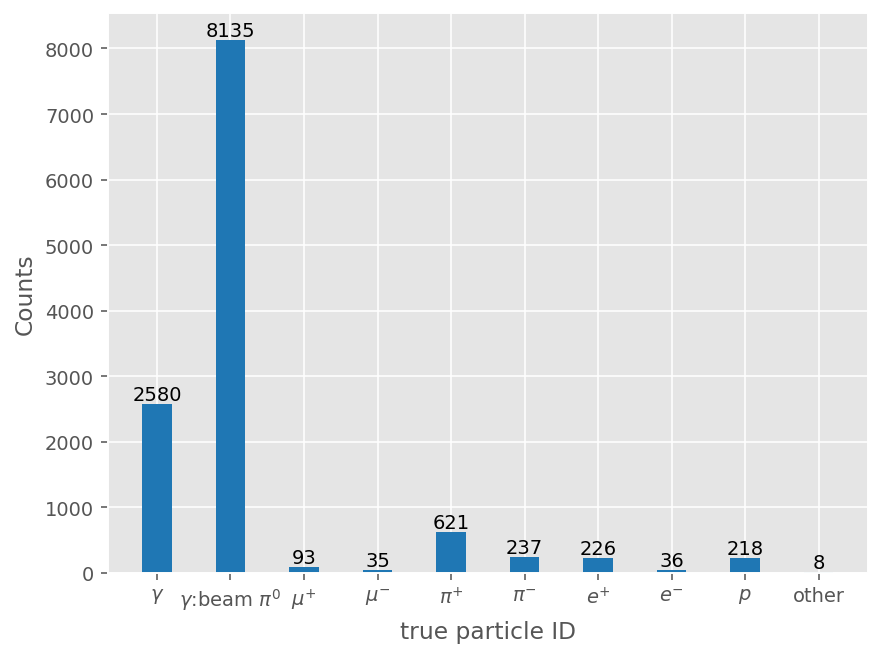

In [8]:
Plots.PlotTags(Tags.GenerateTrueParticleTagsPi0Shower(samples["mc"]), "true particle ID")

# $\pi^{0}$ selection

In [ ]:
samples["mc"].cutTable.get_table()
print(samples["mc"].cutTable.get_masks()[0])
print(samples["mc"].cutTable._signatures)
print(samples["mc"].cutTable._end_sig)

print(len(samples["mc"].cutTable.get_masks()[0][-1]))
print(ak.count(samples["mc"].cutTable.get_masks()[0][-1]))
print(ak.sum(samples["mc"].cutTable.get_masks()[0][-1]))

In [ ]:
# samples["mc"].cutTable._get_mask_signature(mask = samples["mc"].cutTable.get_masks()[0][-1], end = True)
mask = samples["mc"].cutTable.get_masks()[0][-1]
print(mask)
flat_array = isinstance(ak.count(mask, axis=0), int)
curr_simul_masks = samples["mc"].cutTable._group_masks(rcount=1)
mask = curr_simul_masks[0]
for m in curr_simul_masks[1:]:
    mask = mask[m]
if flat_array:
    end_sig = (ak.num(mask, axis=0), -1)
else:
    end_sig = (ak.num(mask, axis=0), ak.sum(mask))
print(end_sig)

print(curr_simul_masks)
# print(mask)
print(flat_array)

In [10]:
photonCandidates = {s : PFOSelection.InitialPi0PhotonSelection(samples[s]) for s in samples}

(['$\\gamma$',
  '$\\gamma$:beam $\\pi^0$',
  '$\\mu^{+}$',
  '$\\mu^{-}$',
  '$\\pi^{+}$',
  '$\\pi^{-}$',
  '$e^{+}$',
  '$e^{-}$',
  '$p$'],
 [838, 2891, 21, 3, 141, 34, 57, 11, 44])

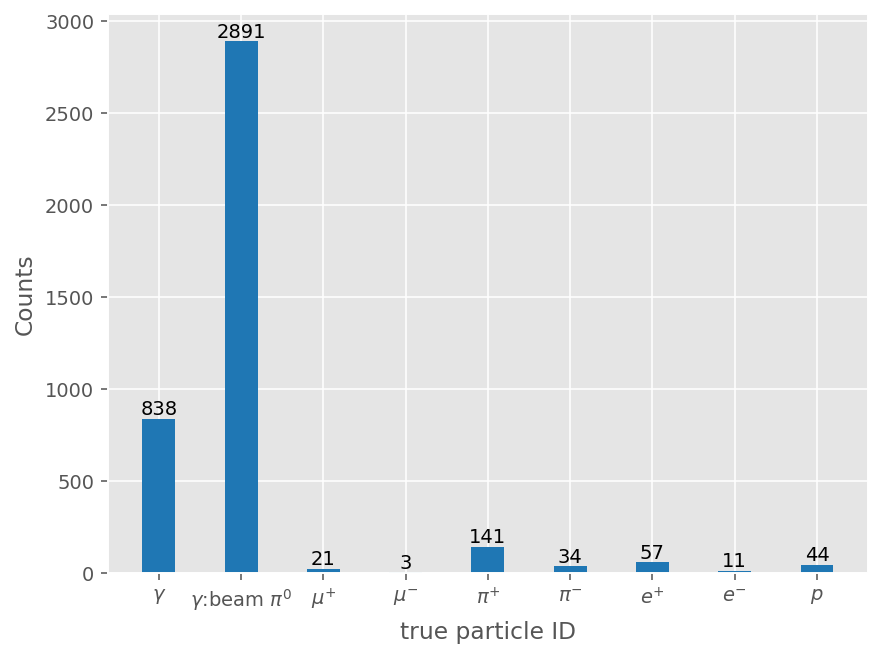

In [15]:
n_photons = {s : ak.sum(photonCandidates[s], -1) for s in samples}
tags = Tags.GenerateTrueParticleTagsPi0Shower(samples["mc"])
for t in tags:
    tags[t].mask = tags[t].mask & (n_photons["mc"] == 2)

Plots.PlotTags(tags, "true particle ID")

(['0 $\\gamma$',
  '1 $\\gamma$',
  "2 $\\gamma$'s, different $\\pi^{0}$",
  "2 $\\gamma$'s, same $\\pi^{0}$"],
 [2, 91, 220, 525])

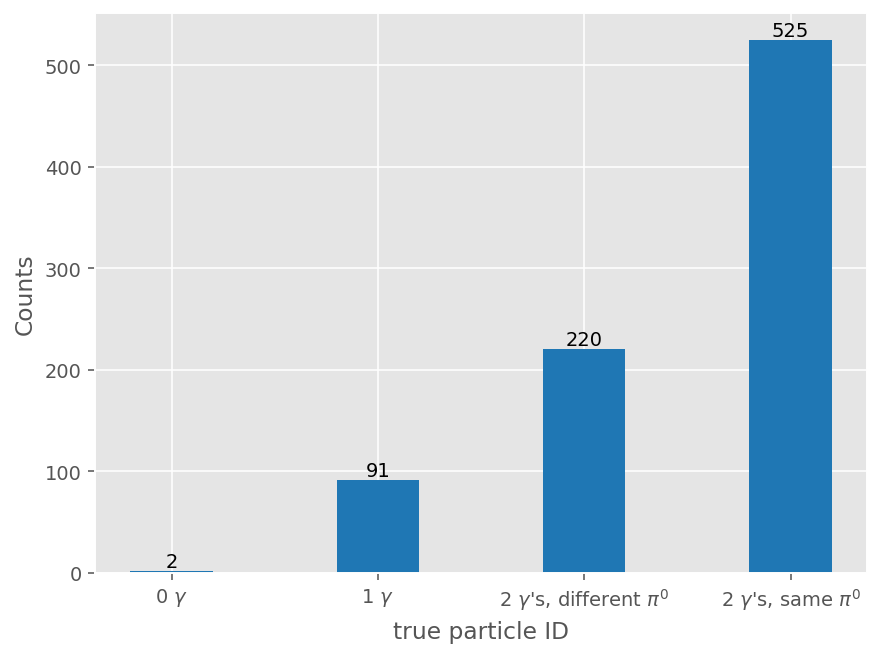

In [25]:
pi0_tags = Tags.GeneratePi0Tags(samples["mc"], photonCandidates["mc"])
for t in pi0_tags:
    pi0_tags[t].mask = pi0_tags[t].mask & (n_photons["mc"] == 2)
for t in pi0_tags:
    pi0_tags[t].mask = pi0_tags[t].mask & (tags["$\\gamma$"].mask)

bar_data = []
for tag in pi0_tags:
    bar_data.extend([tag]*ak.sum(pi0_tags[tag].mask))

Plots.PlotBar(bar_data, xlabel = "true particle ID")

30016

30016

2020

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filters.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filename.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to nTuple_type.
  warnings.warn(f"Couldn't apply filters to {var}.")


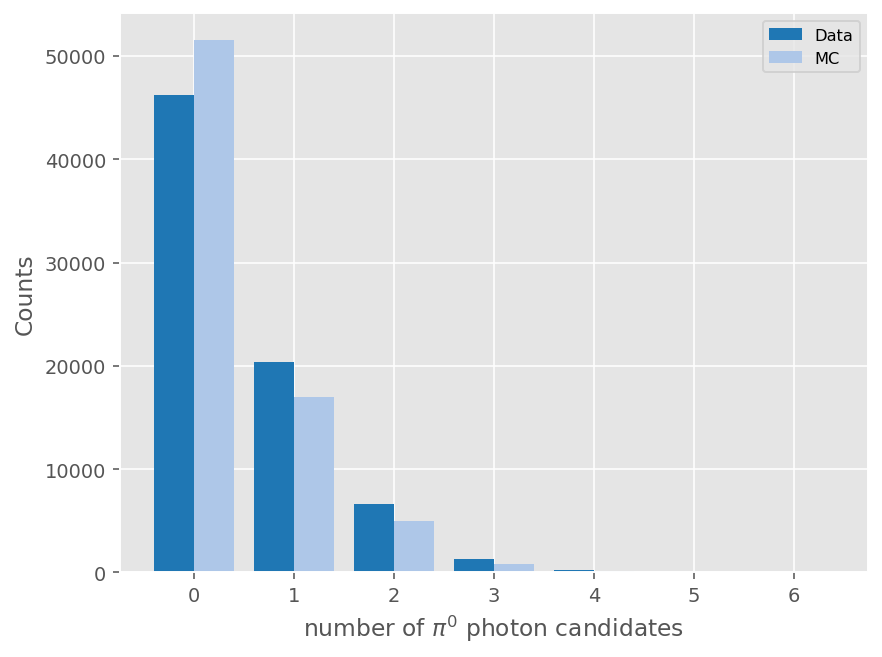

In [111]:
n_photons = {s : ak.sum(photonCandidates[s], -1) for s in samples}

scale = ak.count(n_photons["data"]) / ak.count(n_photons["mc"])

n_photons_scaled = []
u, c = np.unique(n_photons["mc"], return_counts = True)
for i, j in zip(u, c):
    n_photons_scaled.extend([i]* int(scale * j))

Plots.PlotBarComparision(n_photons_scaled, n_photons["data"], xlabel = "number of $\pi^{0}$ photon candidates", label_1 = "MC", label_2 = "Data", barlabel = False)

masks = {s : n_photons[s] == 2 for s in samples}

print(len(masks["mc"]))
print(ak.count(masks["mc"]))
print(ak.sum(masks["mc"]))


FilterSamples(samples, masks)
photonCandidates = {s : photonCandidates[s][masks[s]] for s in samples}

no truth information found, sorting showers by reco energy instead

/home/sb16165/anaconda3/envs/python3_10_0/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(
/home/sb16165/anaconda3/envs/python3_10_0/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in power
  result = getattr(ufunc, method)(


{
    'mc': <Array [[116], [192], ... [627], [244]] type='2020 * var * float64'>,
    'data': <Array [[260], [127], ... [629], [242]] type='6592 * var * float64'>
}

some tags do not have colours, will override them for the default ones


2020

2020

1228

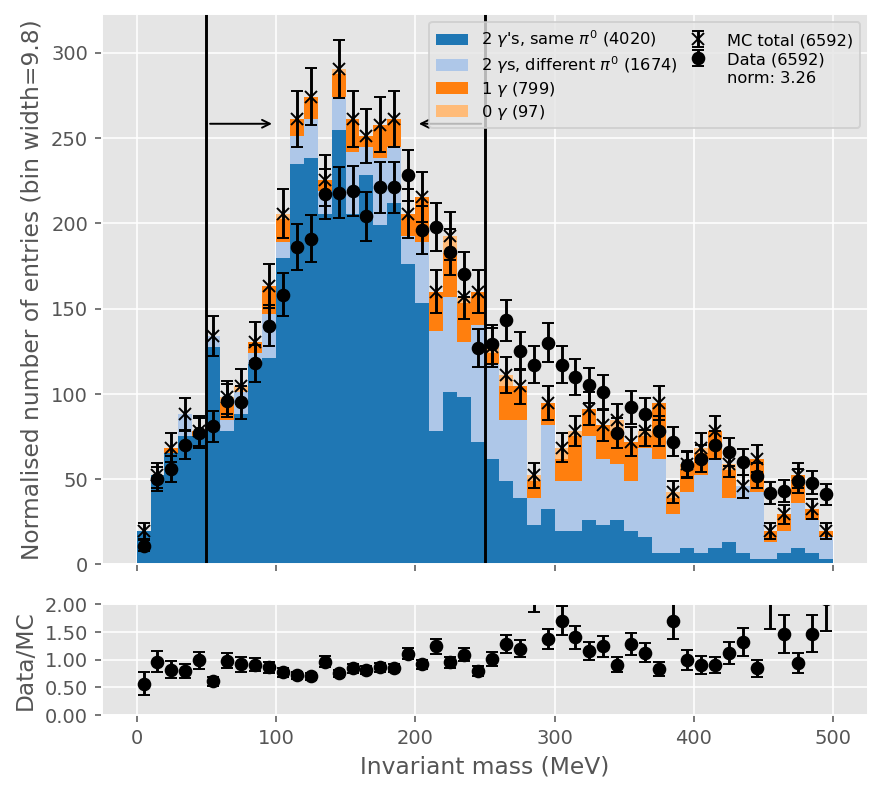

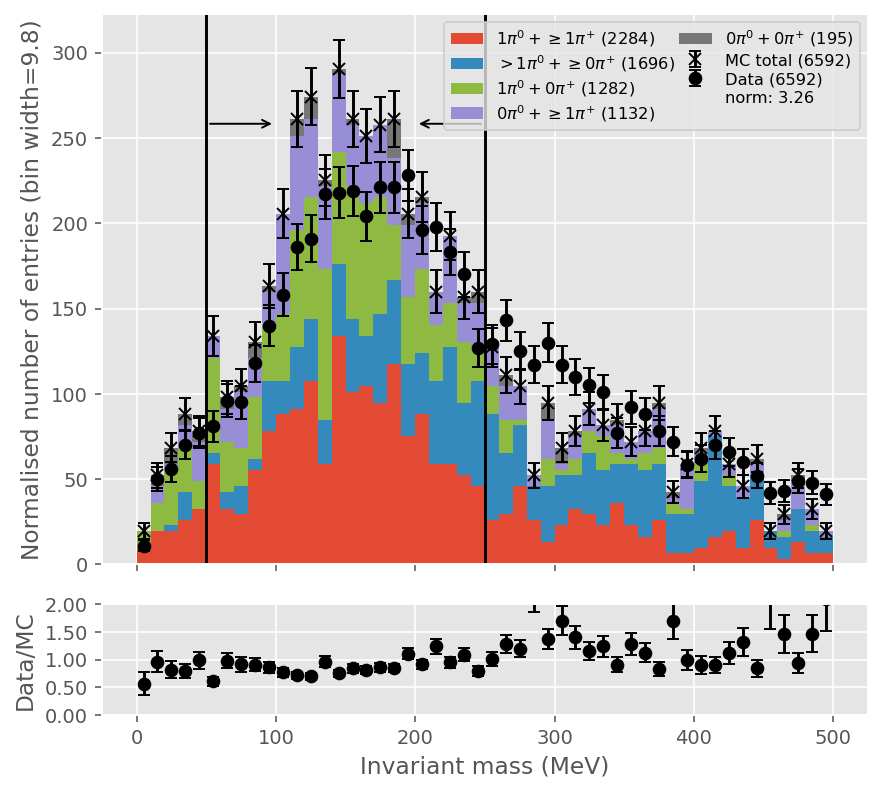

In [112]:
shower_pairs = {s : Master.ShowerPairs(samples[s], shower_pair_mask = photonCandidates[s]) for s in samples}

#* energy correction
correction_function = cross_section.EnergyCorrection.shower_energy_correction[args.correction]

with open(args.correction_params, "r") as f:
    correction_params = json.load(f)

e0 = {s : correction_function(shower_pairs[s].reco_lead_energy, **correction_params) for s in samples}
e1 = {s : correction_function(shower_pairs[s].reco_sub_energy, **correction_params) for s in samples}

mass = {s : Master.ShowerPairs.Mass(e0[s], e1[s], shower_pairs[s].reco_angle) for s in samples}
mass = {s : ak.fill_none(ak.pad_none(mass[s], 1, -1), -999, -1) for s in samples}
print(mass)

# mask = (mass > 50) & (mass < 250)
# mask = ak.flatten(mask) # 1 pi0


Plots.PlotTagged(mass["mc"], Tags.GeneratePi0Tags(samples["mc"], photonCandidates["mc"]), data2 = mass["data"], bins = 50, x_label = "Invariant mass (MeV)", x_range = [0, 500], norm = True)
Plots.DrawCutPosition(50, face = "right", arrow_length = 50)
Plots.DrawCutPosition(250, face = "left", arrow_length = 50)

Plots.PlotTagged(mass["mc"], EventSelection.GenerateTrueFinalStateTags(samples["mc"]), data2 = mass["data"], bins = 50, x_label = "Invariant mass (MeV)", x_range = [0, 500], norm = True)
Plots.DrawCutPosition(50, face = "right", arrow_length = 50)
Plots.DrawCutPosition(250, face = "left", arrow_length = 50)

masks = {s : ak.flatten((mass[s] > 50) & (mass[s] < 250)) for s in samples}

print(len(masks["mc"]))
print(ak.count(masks["mc"]))
print(ak.sum(masks["mc"]))

FilterSamples(samples, masks)
photonCandidates = {s : photonCandidates[s][masks[s]] for s in samples}

In [ ]:
df = samples["mc"].cutTable.get_table()
print(df.iloc[-1])

no truth information found, sorting showers by reco energy instead

some tags do not have colours, will override them for the default ones


/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1176: RuntimeWarning: divide by zero encountered in divide
  ratio = h_data / h_mc # data / MC
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1176: RuntimeWarning: invalid value encountered in divide
  ratio = h_data / h_mc # data / MC
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:1177: RuntimeWarning: invalid value encountered in divide
  ratio_err = ratio * np.sqrt((data_err/h_data)**2 + (mc_error/h_mc)**2)


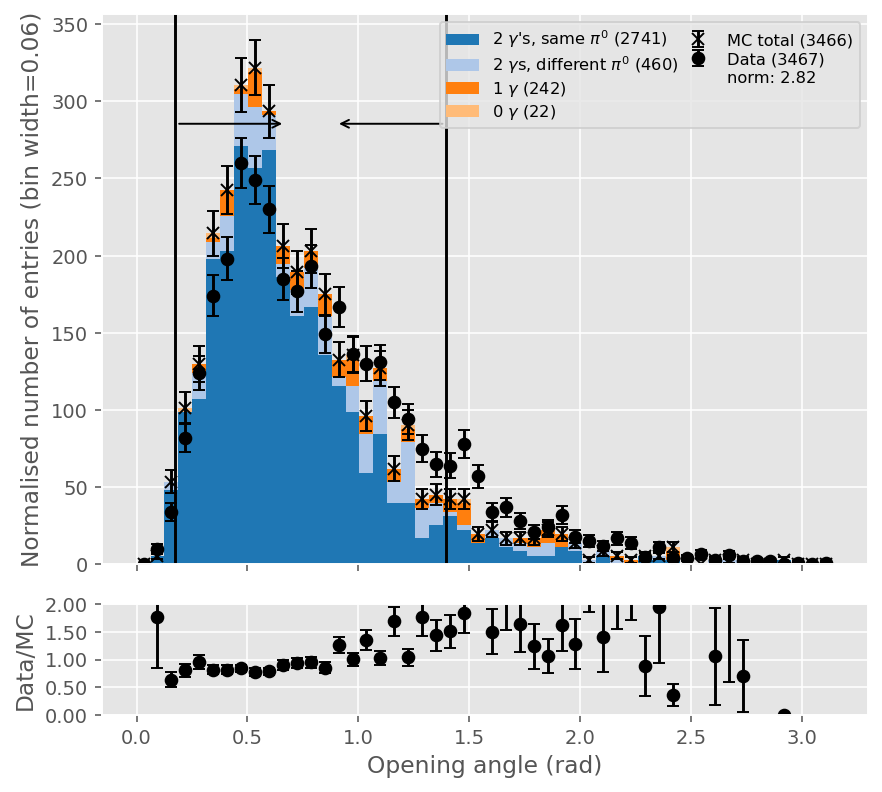

In [113]:
shower_pairs = {s : Master.ShowerPairs(samples[s], shower_pair_mask = photonCandidates[s]) for s in samples}

angle = {s : ak.flatten(shower_pairs[s].reco_angle) for s in samples}

Plots.PlotTagged(angle["mc"], Tags.GeneratePi0Tags(samples["mc"], photonCandidates["mc"]), data2 = angle["data"], bins = 50, x_label = "Opening angle (rad)", x_range = [0, np.pi], norm = True)
Plots.DrawCutPosition((10 * np.pi / 180), face = "right", arrow_length = 0.5)
Plots.DrawCutPosition((80 * np.pi / 180), face = "left", arrow_length = 0.5)

masks = {s : (angle[s] > (10 * np.pi / 180)) & (angle[s] < (80 * np.pi / 180)) for s in samples}
FilterSamples(samples, masks)
# photonCandidates = {s : photonCandidates[s][masks[s]] for s in samples}

In [ ]:
samples["mc"].cutTable.get_table()

# samples["mc"].cutTable._data_changed = True
# for f in samples["mc"].cutTable:
#     print(f(samples["mc"].cutTable._init_data))

# samples["mc"].cutTable.get_masks()

In [ ]:
event_topology_tags = EventSelection.GenerateTrueFinalStateTags(samples["mc"])

for t in event_topology_tags:
    print(event_topology_tags[t].name_simple, ak.sum(event_topology_tags[t].mask), ak.count(event_topology_tags[t].mask))